# Importación modulos y datos

In [2]:
import numpy as np
import pandas as pd
import matplotlib 

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn.preprocessing import normalize

import funciones as f

matplotlib.style.use('ggplot')
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data = pd.read_csv("../data/conchillas_orig.csv", low_memory = False, keep_default_na = False, na_values = '')
print(data.shape)
data.head(5)

(1688, 12)


,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Morfotipo,Labio,cox1-lsu
0,96,1,6.08,2.23,14.03,10.49,8.09,6.96,5.28,LU,1,AA
1,96,2,5.63,1.47,11.63,8.30,6.38,5.86,4.97,LU,1,HG
2,96,5,6.14,1.77,13.77,9.95,8.22,6.10,5.11,LU,1,NaN
3,96,6,6.60,2.20,11.80,9.27,6.56,4.95,5.44,LU,0,NaN
4,96,7,6.07,2.24,13.88,10.49,8.28,7.03,5.29,LU,1,NaN


# Exploración y limpieza de datos

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Lote       1688 non-null   int64  
 1   Individuo  1688 non-null   int64  
 2   AE         1688 non-null   float64
 3   LE         1688 non-null   float64
 4   AT         1688 non-null   float64
 5   LT         1688 non-null   float64
 6   AA         1688 non-null   float64
 7   LA         1688 non-null   float64
 8   NV         1688 non-null   float64
 9   Morfotipo  1688 non-null   object 
 10  Labio      1688 non-null   int64  
 11  cox1-lsu   106 non-null    object 
dtypes: float64(7), int64(3), object(2)
memory usage: 158.4+ KB


In [5]:
# No hay individuos juveniles en el dataset (ancho total menor a 8 milímetros o ausencia de labio)

len(np.logical_or(data.Labio == 1, data.AT >= 8)) == len(data)

True

In [6]:
# Creación de diccionario y reemplazo de haplotipos combinados (105) por haplogrupos (3)
ht = ['AA', 'AB', 'BA', 'CA', 'DA', 'EA', 'FA', 'LA', 'NA', 'OA', 'JH', 'KI', 'GC', 'GD', 'GE', 'GF', 'HG', 'IG', 'MG']
hg = ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '2', '2', '2']
hg_ht_rep = dict(zip(ht, hg))

data["haplogrupos"] = data["cox1-lsu"].replace(hg_ht_rep)

In [7]:
data.iloc[:,2:-3].describe()

,AE,LE,AT,LT,AA,LA,NV
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,6.242690,1.763626,13.268957,9.778969,7.692814,6.264846,5.144419
std,0.981426,0.376717,1.942482,1.436368,1.234036,0.914297,0.298324
min,3.120000,0.680000,8.020000,6.050000,4.710000,4.210000,4.000000
25%,5.577500,1.500000,11.777500,8.760000,6.787500,5.600000,4.950000
50%,6.240000,1.760000,13.195000,9.695000,7.590000,6.140000,5.175000
75%,6.892500,2.030000,14.602500,10.845000,8.560000,6.800000,5.340000
max,9.070000,3.150000,19.130000,14.460000,11.970000,9.770000,5.970000


In [8]:
round(data['Morfotipo'].value_counts(normalize = True)*100, 2)
data['haplogrupos'].value_counts()
data['cox1-lsu'].value_counts()

LU    86.02
LB    13.27
DU     0.71
Name: Morfotipo, dtype: float64

0    85
2    12
1     9
Name: haplogrupos, dtype: int64

AA    68
HG    10
BA     3
LA     3
GF     3
GC     3
CA     2
OA     2
GE     2
AB     1
DA     1
KI     1
MG     1
FA     1
EA     1
GD     1
JH     1
IG     1
NA     1
Name: cox1-lsu, dtype: int64

In [9]:
data = pd.get_dummies(data, columns = ["Morfotipo"], drop_first = True)
data.head(5)

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Labio,cox1-lsu,haplogrupos,Morfotipo_LB,Morfotipo_LU
0,96,1,6.08,2.23,14.03,10.49,8.09,6.96,5.28,1,AA,0,0,1
1,96,2,5.63,1.47,11.63,8.30,6.38,5.86,4.97,1,HG,2,0,1
2,96,5,6.14,1.77,13.77,9.95,8.22,6.10,5.11,1,NaN,NaN,0,1
3,96,6,6.60,2.20,11.80,9.27,6.56,4.95,5.44,0,NaN,NaN,0,1
4,96,7,6.07,2.24,13.88,10.49,8.28,7.03,5.29,1,NaN,NaN,0,1


### Creación columnas nuevas

In [10]:
# Ratios
# Cada parte sobre sí misma
data["Ratio_LE_AE"] = data["LE"]/data["AE"] # Espira
data["Ratio_LT_AT"] = data["LT"]/data["AT"] # Total
data["Ratio_LA_AA"] = data["LA"]/data["AA"] # Abertura

# Espira / Total
data["Ratio_LE_LT"] = data["LE"]/data["LT"] # Largo
data["Ratio_AE_AT"] = data["AE"]/data["AT"] # Ancho

# Abertura / Total
data["Ratio_LA_LT"] = data["LA"]/data["LT"] # Largo
data["Ratio_AA_AT"] = data["AA"]/data["AT"] # Ancho

# Espira / Abertura
data["Ratio_LE_LA"] = data["LE"]/data["LA"] # Largo
data["Ratio_AE_AA"] = data["AE"]/data["AA"] # Ancho

data.head(5)

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Labio,...,Morfotipo_LU,Ratio_LE_AE,Ratio_LT_AT,Ratio_LA_AA,Ratio_LE_LT,Ratio_AE_AT,Ratio_LA_LT,Ratio_AA_AT,Ratio_LE_LA,Ratio_AE_AA
0,96,1,6.08,2.23,14.03,10.49,8.09,6.96,5.28,1,...,1,0.366776,0.747684,0.860321,0.212583,0.433357,0.663489,0.576622,0.320402,0.751545
1,96,2,5.63,1.47,11.63,8.30,6.38,5.86,4.97,1,...,1,0.261101,0.713672,0.918495,0.177108,0.484093,0.706024,0.548581,0.250853,0.882445
2,96,5,6.14,1.77,13.77,9.95,8.22,6.10,5.11,1,...,1,0.288274,0.722585,0.742092,0.177889,0.445897,0.613065,0.596950,0.290164,0.746959
3,96,6,6.60,2.20,11.80,9.27,6.56,4.95,5.44,0,...,1,0.333333,0.785593,0.754573,0.237325,0.559322,0.533981,0.555932,0.444444,1.006098
4,96,7,6.07,2.24,13.88,10.49,8.28,7.03,5.29,1,...,1,0.369028,0.755764,0.849034,0.213537,0.437320,0.670162,0.596542,0.318634,0.733092


In [11]:
# Powers
potencia = 4

# Espira
data["Power_LE"] = data["LE"] ** potencia # Largo
data["Power_AE"] = data["AE"] ** potencia # Ancho

# Total
data["Power_LT"] = data["LT"] ** potencia # Largo
data["Power_AT"] = data["AT"] ** potencia # Ancho

# Abertura
data["Power_LA"] = data["LA"] ** potencia # Largo
data["Power_AA"] = data["AA"] ** potencia # Ancho

# Número de vueltas
data["Power_NV"] = data["NV"] ** potencia

data.head(5)

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Labio,...,Ratio_AA_AT,Ratio_LE_LA,Ratio_AE_AA,Power_LE,Power_AE,Power_LT,Power_AT,Power_LA,Power_AA,Power_NV
0,96,1,6.08,2.23,14.03,10.49,8.09,6.96,5.28,1,...,0.576622,0.320402,0.751545,24.729734,1366.514729,12108.823608,38746.339913,2346.588611,4283.453794,777.205187
1,96,2,5.63,1.47,11.63,8.30,6.38,5.86,4.97,1,...,0.548581,0.250853,0.882445,4.669489,1004.693470,4745.832100,18294.428998,1179.208128,1656.848179,610.134461
2,96,5,6.14,1.77,13.77,9.95,8.22,6.10,5.11,1,...,0.596950,0.290164,0.746959,9.815062,1421.259840,9801.495006,35953.051846,1384.584100,4565.488679,681.841766
3,96,6,6.60,2.20,11.80,9.27,6.56,4.95,5.44,0,...,0.555932,0.444444,1.006098,23.425600,1897.473600,7384.463302,19387.777600,600.372506,1851.890729,875.781161
4,96,7,6.07,2.24,13.88,10.49,8.28,7.03,5.29,1,...,0.596542,0.318634,0.733092,25.176310,1357.546656,12108.823608,37115.717839,2442.425357,4700.254211,783.109853


In [12]:
# Power_ratios
# (Cada parte sobre sí misma) ** potencia
data["Power_Ratio_LE_AE"] = data["Ratio_LE_AE"] ** potencia # Espira
data["Power_Ratio_LT_AT"] = data["Ratio_LT_AT"] ** potencia # Total
data["Power_Ratio_LA_AA"] = data["Ratio_LA_AA"] ** potencia # Abertura

# (Espira / Total) ** potencia
data["Power_Ratio_LE_LT"] = data["Ratio_LE_LT"] ** potencia # Largo
data["Power_Ratio_AE_AT"] = data["Ratio_AE_AT"] ** potencia # Ancho

# (Abertura / Total) ** potencia
data["Power_Ratio_LA_LT"] = data["Ratio_LA_LT"] ** potencia # Largo
data["Power_Ratio_AA_AT"] = data["Ratio_AA_AT"] ** potencia # Ancho

# (Espira / Abertura) ** potencia
data["Power_Ratio_LE_LA"] = data["Ratio_LE_LA"] ** potencia # Largo
data["Power_Ratio_AE_AA"] = data["Ratio_AE_AA"] ** potencia # Ancho

In [13]:
data.columns

Index(['Lote', 'Individuo', 'AE', 'LE', 'AT', 'LT', 'AA', 'LA', 'NV', 'Labio',
       'cox1-lsu', 'haplogrupos', 'Morfotipo_LB', 'Morfotipo_LU',
       'Ratio_LE_AE', 'Ratio_LT_AT', 'Ratio_LA_AA', 'Ratio_LE_LT',
       'Ratio_AE_AT', 'Ratio_LA_LT', 'Ratio_AA_AT', 'Ratio_LE_LA',
       'Ratio_AE_AA', 'Power_LE', 'Power_AE', 'Power_LT', 'Power_AT',
       'Power_LA', 'Power_AA', 'Power_NV', 'Power_Ratio_LE_AE',
       'Power_Ratio_LT_AT', 'Power_Ratio_LA_AA', 'Power_Ratio_LE_LT',
       'Power_Ratio_AE_AT', 'Power_Ratio_LA_LT', 'Power_Ratio_AA_AT',
       'Power_Ratio_LE_LA', 'Power_Ratio_AE_AA'],
      dtype='object')

### Relación entre variables

In [14]:
Medidas = ['AE', 'LE', 'AT', 'LT', 'AA', 'LA', 'NV', 'Morfotipo_LB', 'Morfotipo_LU']
Ratios = ['Ratio_LE_AE', 'Ratio_LT_AT', 'Ratio_LA_AA', 'Ratio_LE_LT', 'Ratio_AE_AT', 'Ratio_LA_LT', 'Ratio_AA_AT', 'Ratio_LE_LA', 'Ratio_AE_AA', 'Morfotipo_LB', 'Morfotipo_LU']
Powers = ['Power_LE', 'Power_AE', 'Power_LT', 'Power_AT', 'Power_LA', 'Power_AA', 'Power_NV', 'Morfotipo_LB', 'Morfotipo_LU']
Powers_ratios = ['Power_Ratio_LE_AE', 'Power_Ratio_LT_AT', 'Power_Ratio_LA_AA', 'Power_Ratio_LE_LT', 'Power_Ratio_AE_AT', 'Power_Ratio_LA_LT', 'Power_Ratio_AA_AT', 'Power_Ratio_LE_LA', 'Power_Ratio_AE_AA', 'Morfotipo_LB', 'Morfotipo_LU']
Todo = Medidas + Ratios + Powers + Powers_ratios
Todo = list(dict.fromkeys(Todo)) #para eliminar elementos duplicados de una lista
print(Todo)

['AE', 'LE', 'AT', 'LT', 'AA', 'LA', 'NV', 'Morfotipo_LB', 'Morfotipo_LU', 'Ratio_LE_AE', 'Ratio_LT_AT', 'Ratio_LA_AA', 'Ratio_LE_LT', 'Ratio_AE_AT', 'Ratio_LA_LT', 'Ratio_AA_AT', 'Ratio_LE_LA', 'Ratio_AE_AA', 'Power_LE', 'Power_AE', 'Power_LT', 'Power_AT', 'Power_LA', 'Power_AA', 'Power_NV', 'Power_Ratio_LE_AE', 'Power_Ratio_LT_AT', 'Power_Ratio_LA_AA', 'Power_Ratio_LE_LT', 'Power_Ratio_AE_AT', 'Power_Ratio_LA_LT', 'Power_Ratio_AA_AT', 'Power_Ratio_LE_LA', 'Power_Ratio_AE_AA']


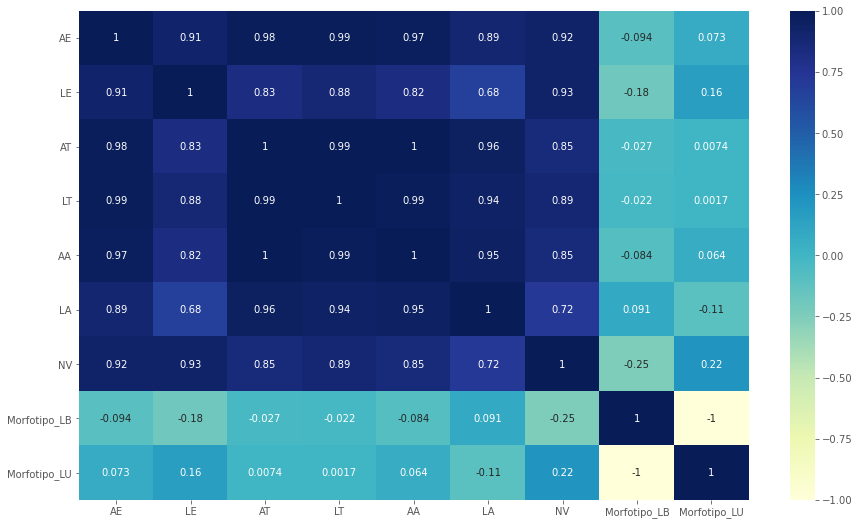

In [15]:
#variables originales del dataset
f._print_matriz_correlacion(data[Medidas].corr())

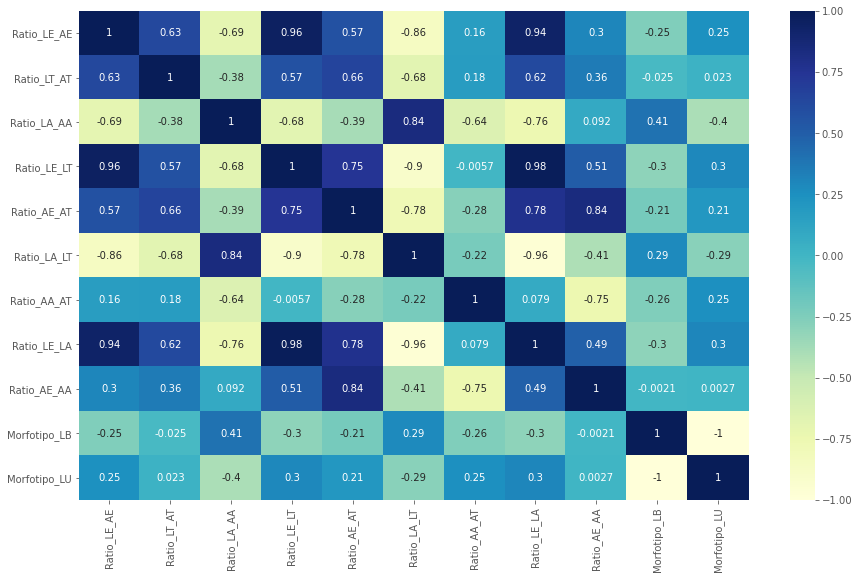

In [16]:
#variables originales del dataset
f._print_matriz_correlacion(data[Ratios].corr())

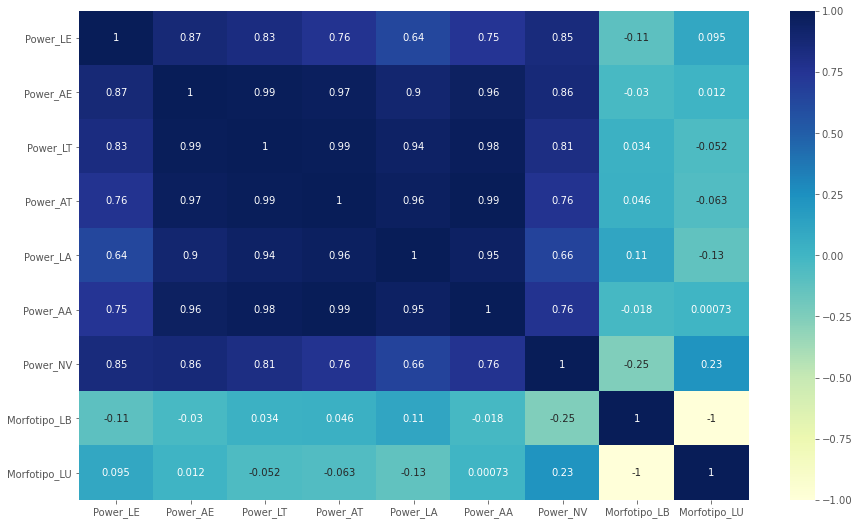

In [17]:
#variables originales del dataset
f._print_matriz_correlacion(data[Powers].corr())

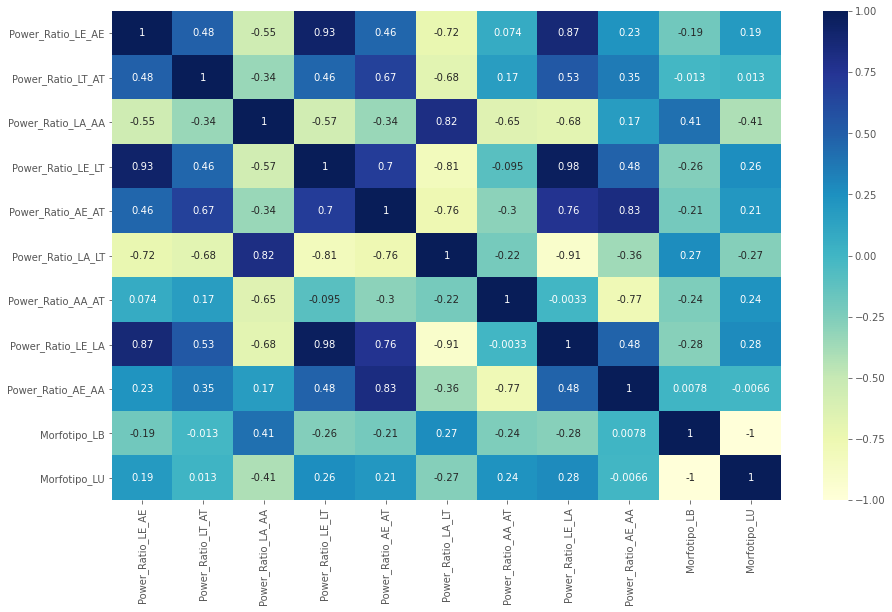

In [18]:
#variables originales del dataset
f._print_matriz_correlacion(data[Powers_ratios].corr())

In [19]:
# sns.pairplot(data=data,x_vars = Medidas,\
#          y_vars= Medidas,hue='haplogrupos',plot_kws={'alpha': 0.5},aspect=1.5);

In [20]:
# sns.pairplot(data=data,x_vars = Ratios,\
#          y_vars= Ratios,hue='haplogrupos',plot_kws={'alpha': 0.5},aspect=1.5);

In [21]:
# sns.pairplot(data=data,x_vars = Powers,\
#          y_vars= Powers,hue='haplogrupos',plot_kws={'alpha': 0.5},aspect=1.5);

In [22]:
# sns.pairplot(data=data,x_vars = Powers_ratios,\
#          y_vars= Powers_ratios,hue='haplogrupos',plot_kws={'alpha': 0.5},aspect=1.5);

In [23]:
#sns.pairplot(data=data,x_vars = Todo,\
#         y_vars= Todo,hue='haplogrupos',plot_kws={'alpha': 0.5},aspect=1.5);

### Distribución de las observaciones

In [24]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 9))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  
    plt.show()

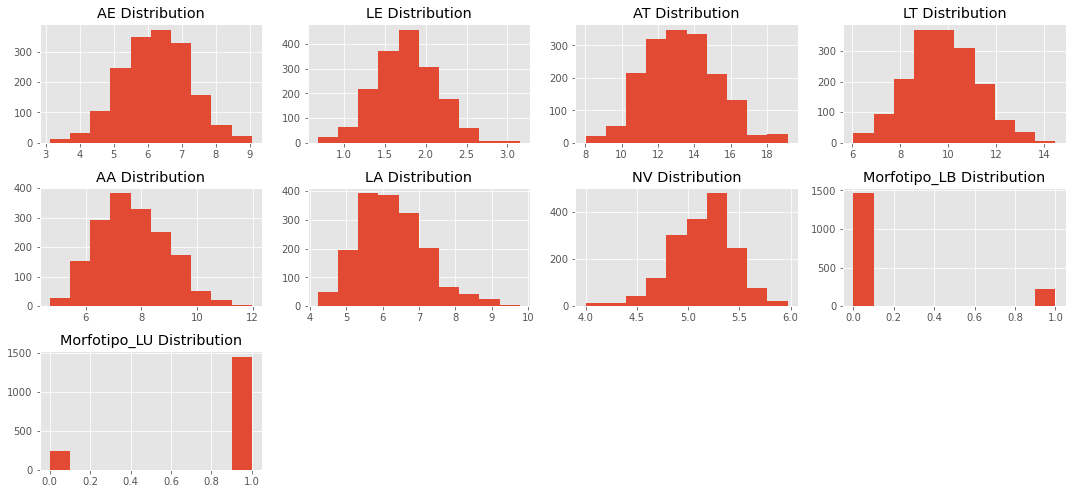

In [25]:
draw_histograms(data, data[Medidas], 4, 4)

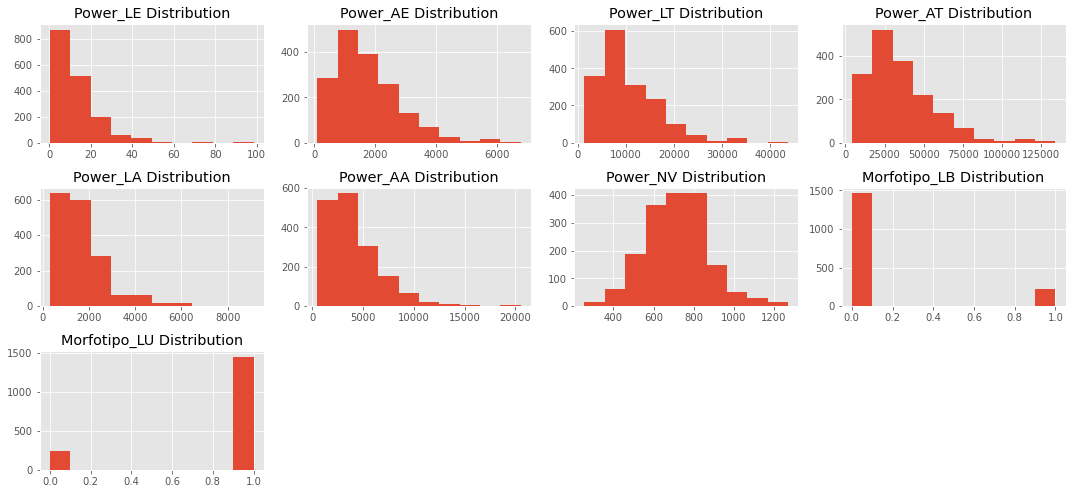

In [26]:
draw_histograms(data, data[Powers], 4, 4)

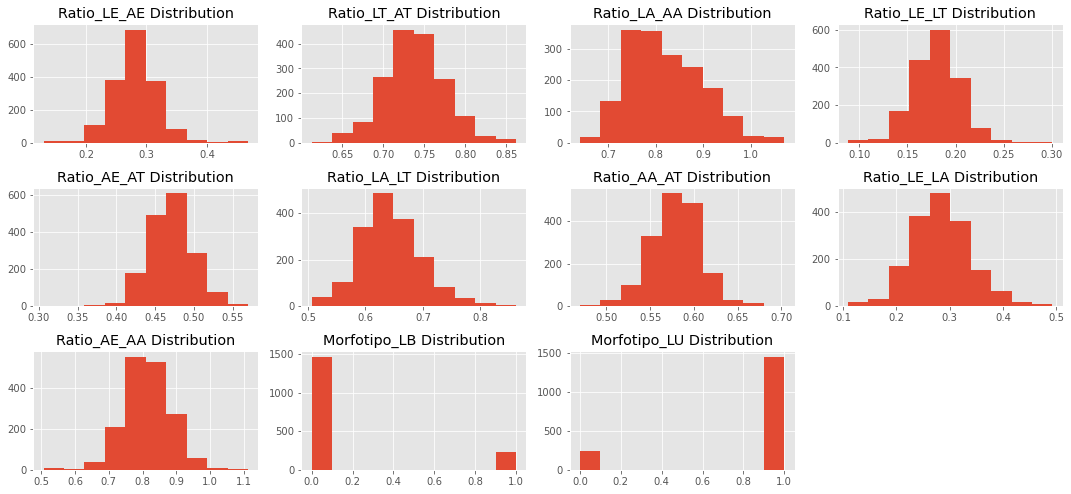

In [27]:
draw_histograms(data, data[Ratios], 4, 4)

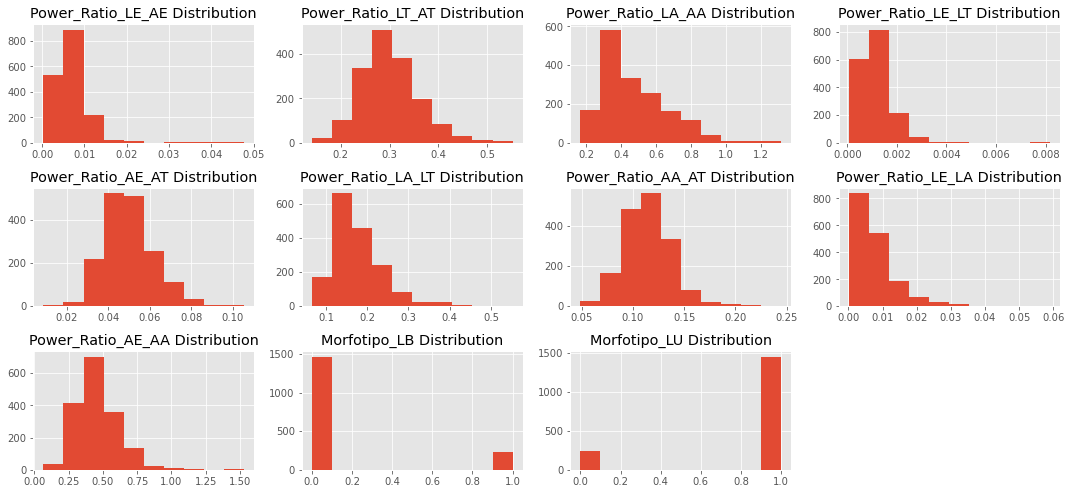

In [28]:
draw_histograms(data, data[Powers_ratios], 4, 4)

# Modelos de clustering

## Importación modulos y dataset

In [29]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score,calinski_harabasz_score
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.cm as cm

## Prueba Kmeans

### Con las variables originales

In [30]:
x1 = data[Medidas]
x2 = data[Powers]
x3 = data[Ratios]
x4 = data[Powers_ratios]
x5 = data[Todo]
y_true = data["haplogrupos"]

scaler = StandardScaler()
x1_scaled=scaler.fit_transform(x1)
x2_scaled=scaler.fit_transform(x2)
x3_scaled=scaler.fit_transform(x3)
x4_scaled=scaler.fit_transform(x4)
x5_scaled=scaler.fit_transform(x5)


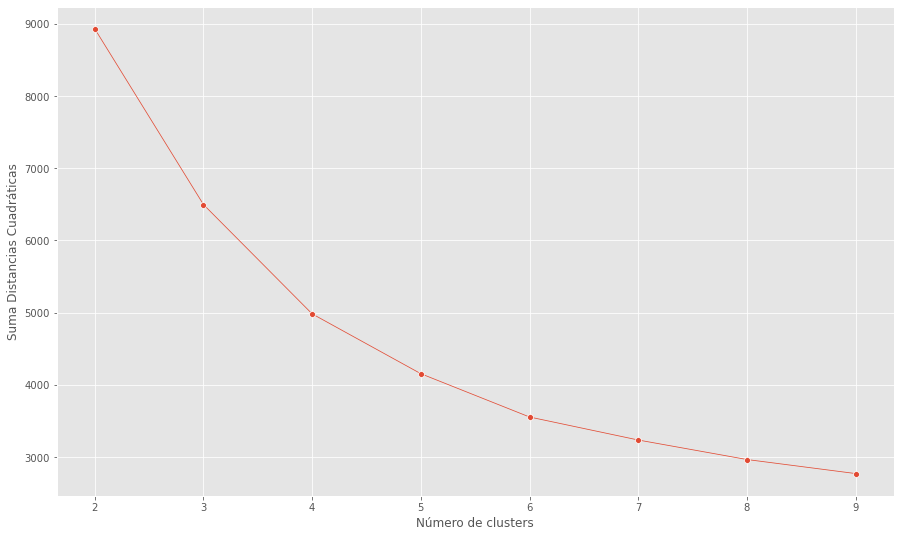

In [31]:
#x1_scaled medidas
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x1_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters'); 

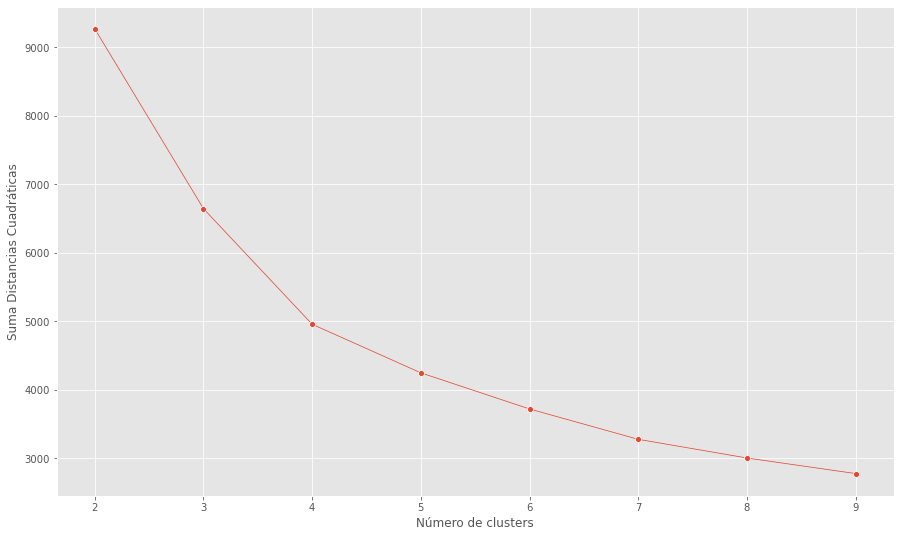

In [32]:
#x2_scaled powers
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x2_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters'); 

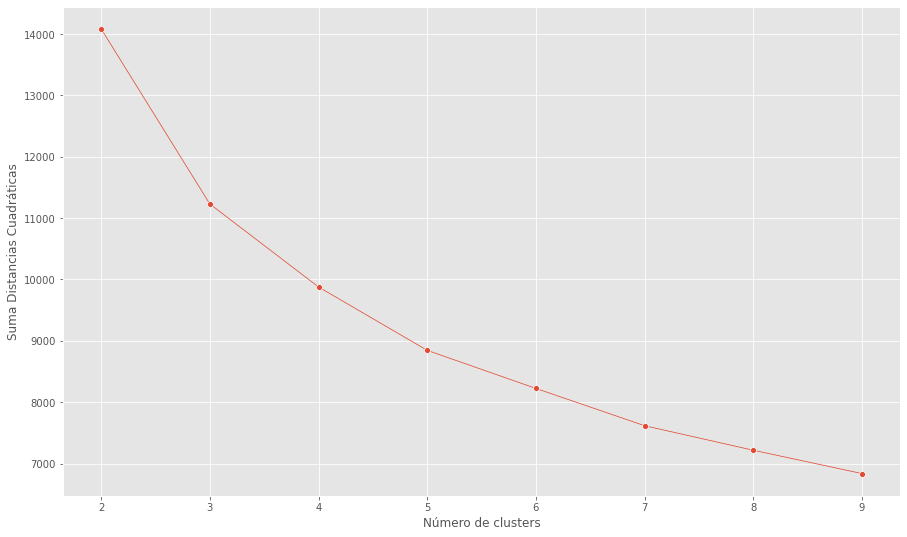

In [33]:
#x3_scaled ratios
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x3_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters'); 

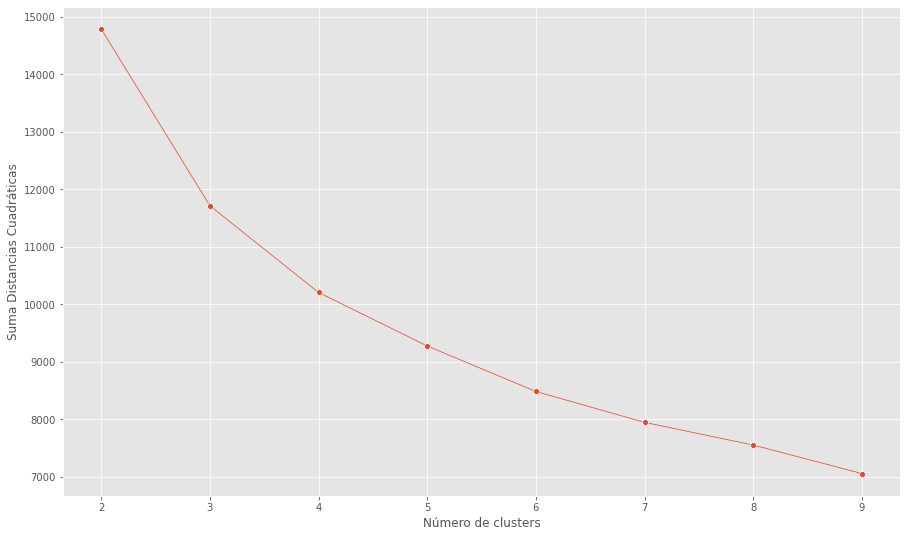

In [34]:
#x4_scaled powers ratios
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x4_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters'); 

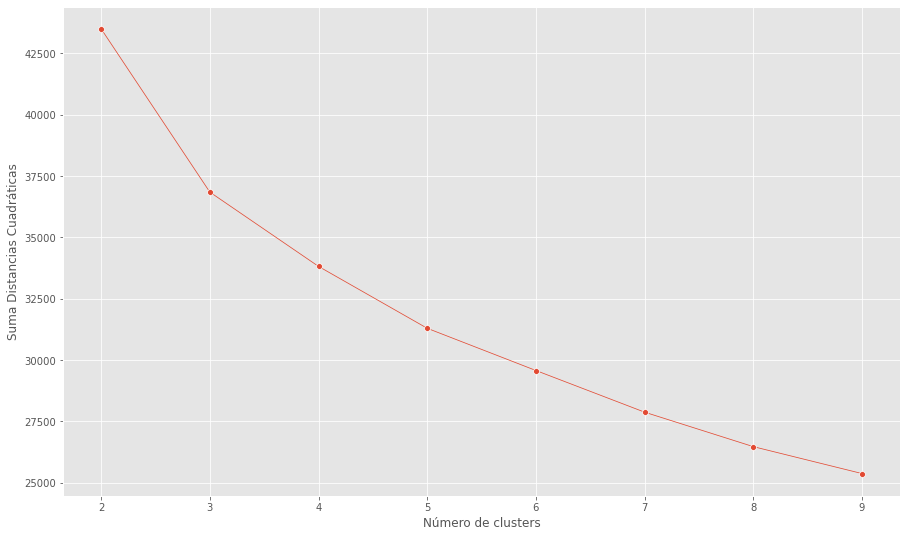

In [35]:
#x5_scaled todo
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x5_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters'); 

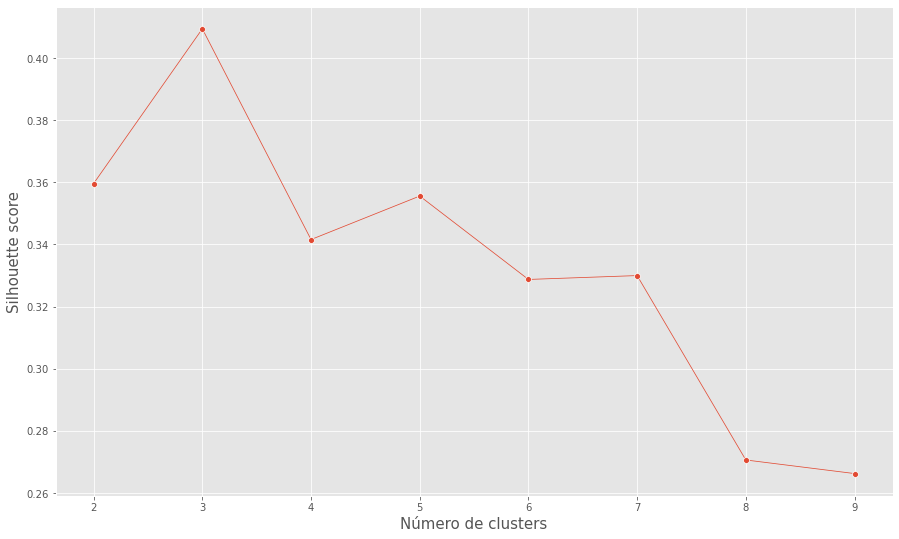

In [36]:
#x1_scaled medidas
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x1_scaled)
    score=silhouette_score(x1_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

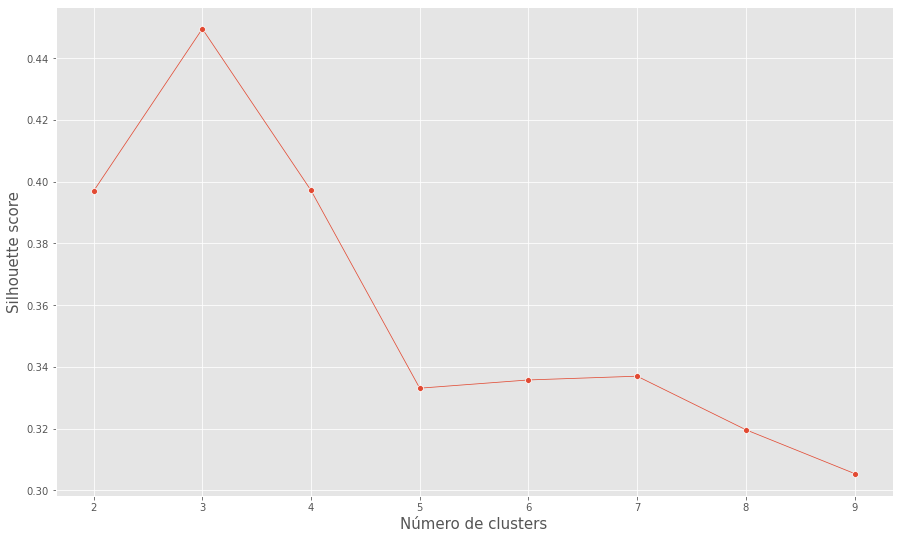

In [37]:
#x2_scaled powers
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x2_scaled)
    score=silhouette_score(x2_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

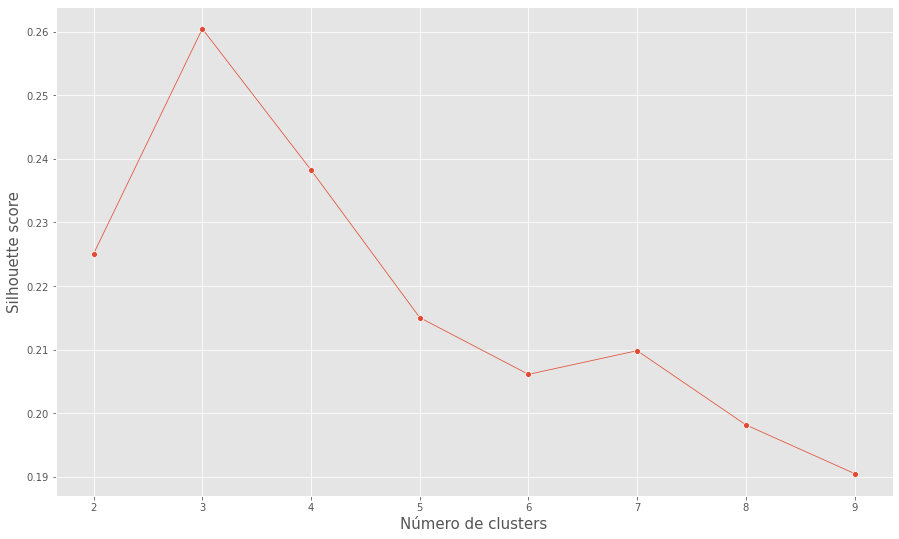

In [38]:
#x3_scaled ratios
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x3_scaled)
    score=silhouette_score(x3_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

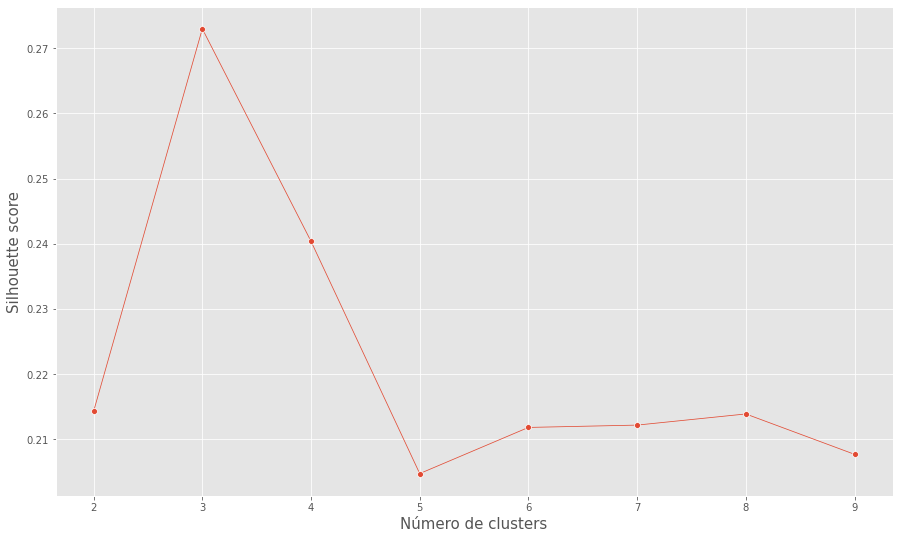

In [39]:
#x4_scaled power ratios
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x4_scaled)
    score=silhouette_score(x4_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

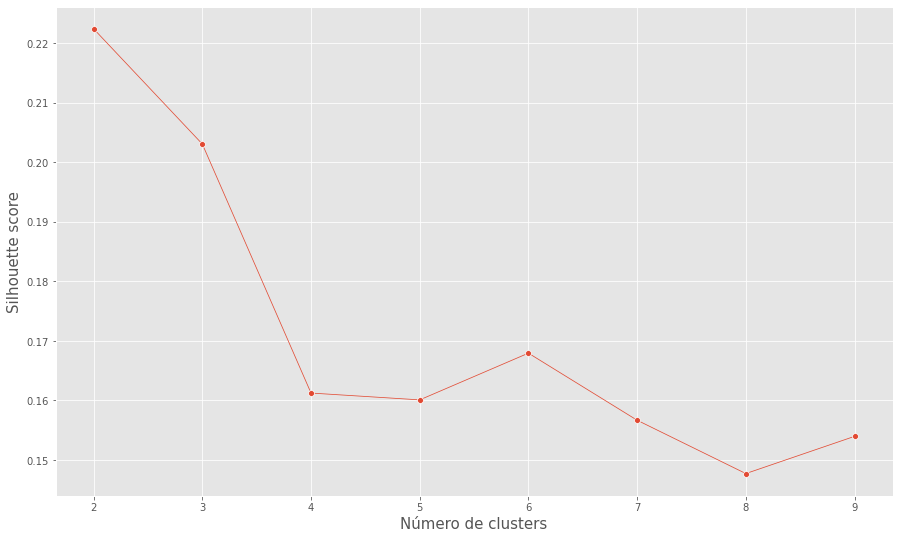

In [40]:
#x5_scaled todo
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x5_scaled)
    score=silhouette_score(x5_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

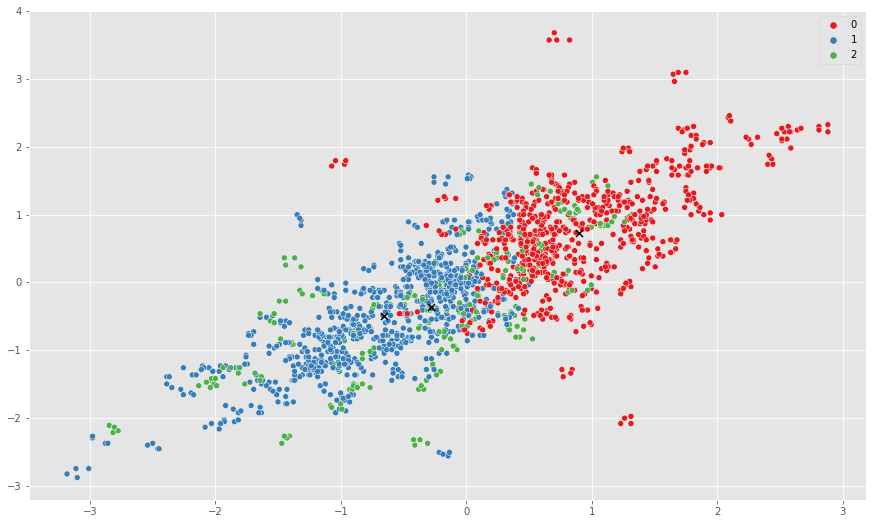

In [41]:
#x1_scaled medidas
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x1_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x1_scaled[:,0],y=x1_scaled[:,1],hue=labels,legend='full', palette = 'Set1');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

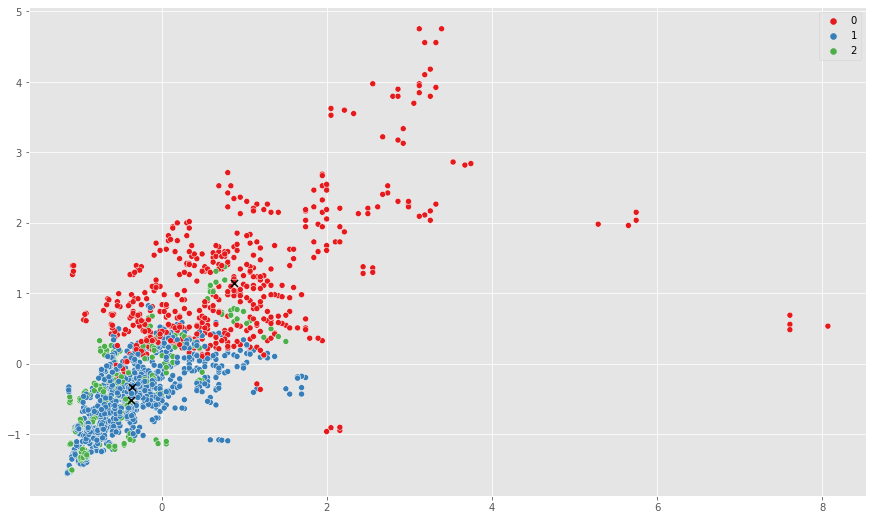

In [42]:
#x2_scaled powers
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x2_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x2_scaled[:,0],y=x2_scaled[:,1],hue=labels,legend='full', palette = 'Set1');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

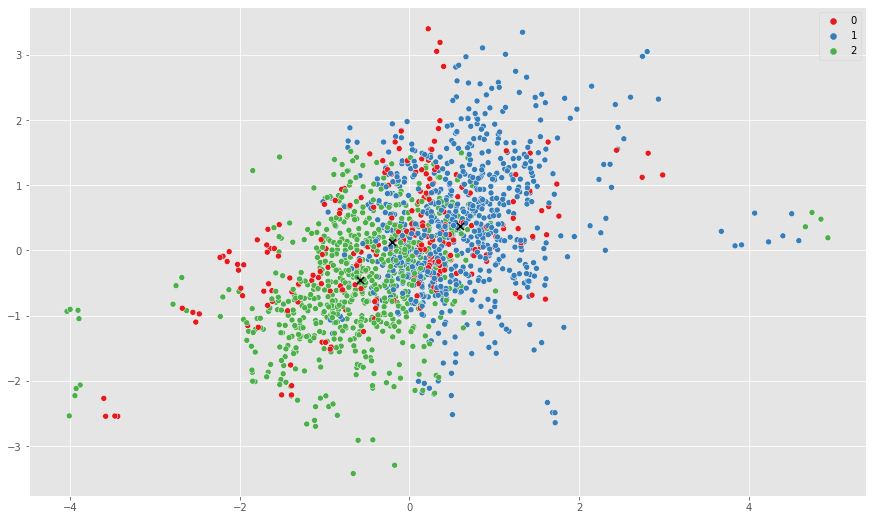

In [43]:
#x3_scaled ratios
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x3_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x3_scaled[:,0],y=x3_scaled[:,1],hue=labels,legend='full', palette = 'Set1');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

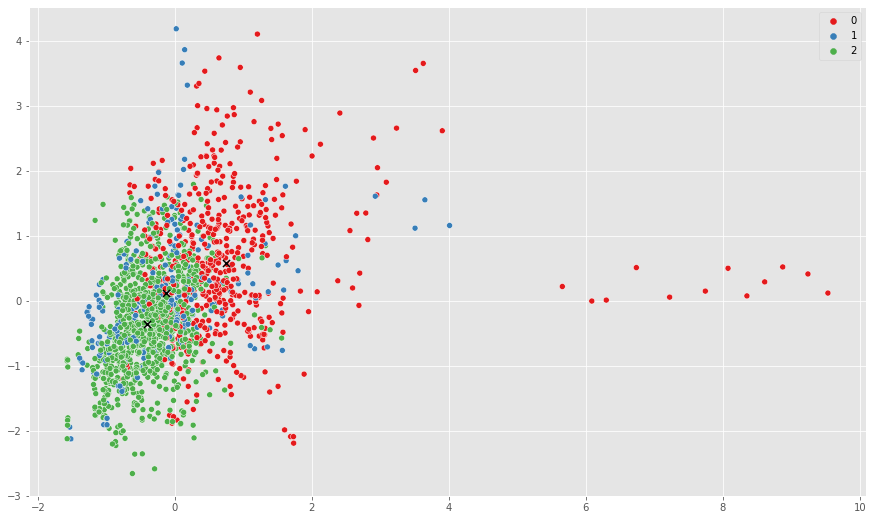

In [44]:
#x4_scaled powers ratios
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x4_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x4_scaled[:,0],y=x4_scaled[:,1],hue=labels,legend='full', palette = 'Set1');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

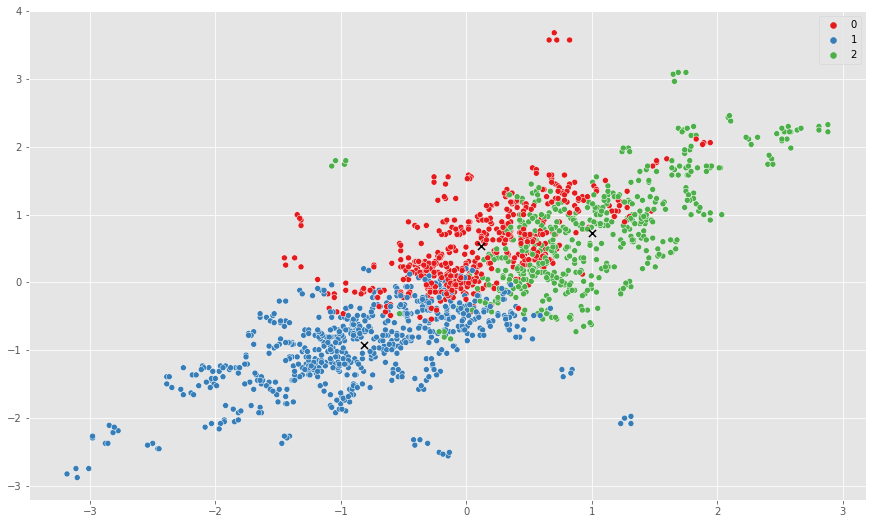

In [45]:
#x5_scaled todo
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x5_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x5_scaled[:,0],y=x5_scaled[:,1],hue=labels,legend='full', palette="Set1");

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'Kmeans')

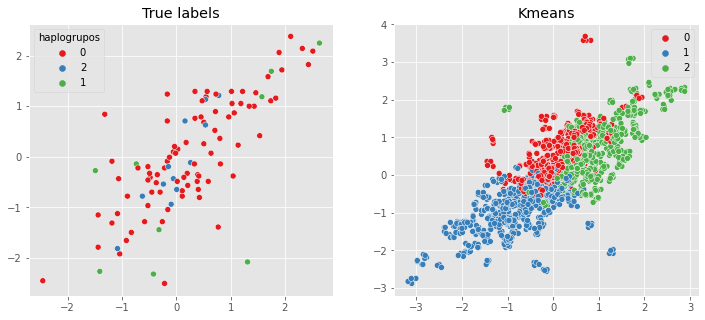

In [46]:
#x1_scaled medidas
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x1_scaled[:,0], y = x1_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x1_scaled[:,0], y = x1_scaled[:,1],hue=labels,ax=ax[1], palette = 'Set1')
ax[1].set_title('Kmeans')

<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'Kmeans')

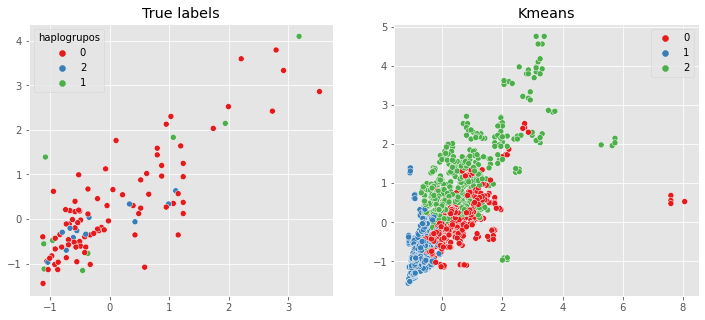

In [47]:
#x2_scaled powers
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x2_scaled[:,0], y = x2_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x2_scaled[:,0], y = x2_scaled[:,1],hue=labels,ax=ax[1], palette = 'Set1')
ax[1].set_title('Kmeans')

<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'Kmeans')

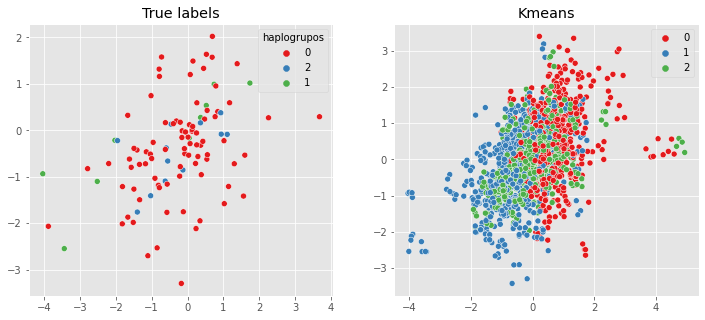

In [48]:
#x3_scaled ratios
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x3_scaled[:,0], y = x3_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x3_scaled[:,0], y = x3_scaled[:,1],hue=labels,ax=ax[1], palette = 'Set1')
ax[1].set_title('Kmeans')

<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'Kmeans')

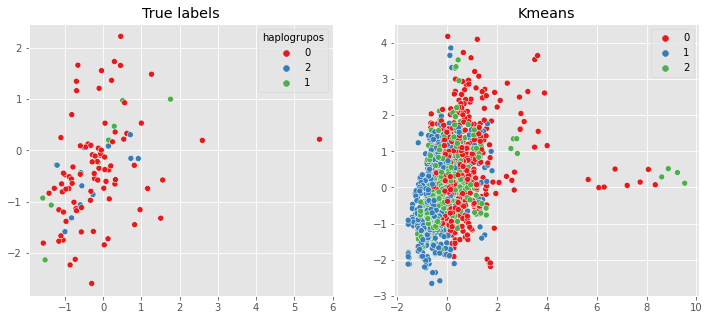

In [49]:
#x4_scaled powers ratios
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x4_scaled[:,0], y = x4_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x4_scaled[:,0], y = x4_scaled[:,1],hue=labels,ax=ax[1], palette = 'Set1')
ax[1].set_title('Kmeans')

<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'Kmeans')

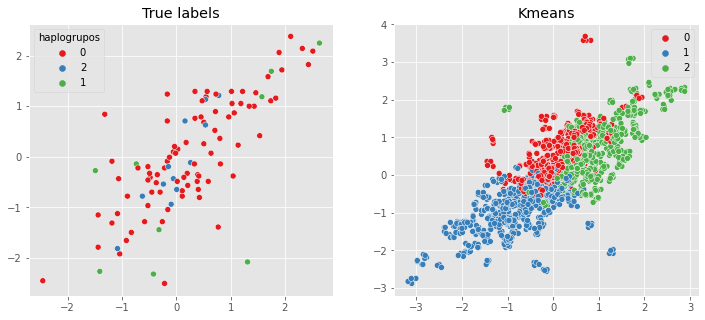

In [50]:
#x5_scaled todos
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x5_scaled[:,0], y = x5_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x5_scaled[:,0], y = x5_scaled[:,1],hue=labels,ax=ax[1], palette = 'Set1')
ax[1].set_title('Kmeans')



<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'Kmeans')

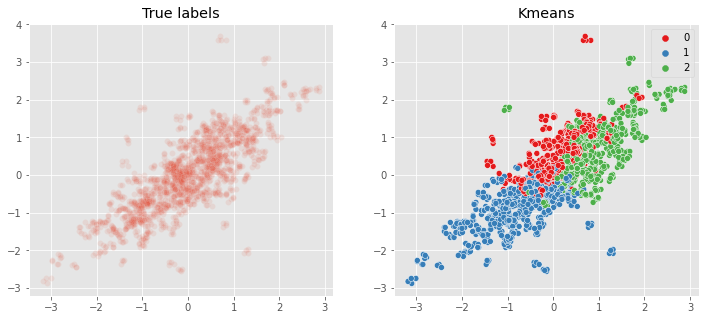

In [51]:
#x5_scaled todos (agregamos alpha)
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x5_scaled[:,0], y = x5_scaled[:,1],ax=ax[0], alpha=0.1)
#sns.scatterplot(x = x_scaled[indices,0], y = x_scaled[indices,1],hue=y_true[y_true!="0"],ax=ax[0], palette="magma")
ax[0].set_title('True labels')
sns.scatterplot(x = x5_scaled[:,0], y = x5_scaled[:,1],hue=labels,ax=ax[1], palette = 'Set1')
ax[1].set_title('Kmeans')

In [52]:
#sns.heatmap(confusion_matrix(y_true,labels),annot=True,cmap='Blues',fmt=".0f");

#print(classification_report(y_true,labels))

## DBSCAN

In [53]:
from scipy.spatial.distance import pdist,squareform

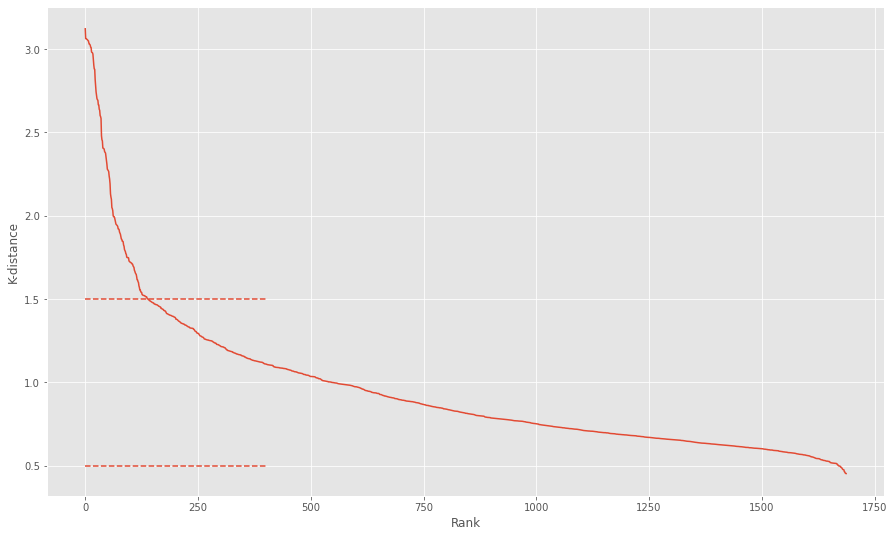

In [54]:
#x1_scaled medidas
minPts=20;
k=minPts-1;

D=squareform(pdist(x1_scaled));

k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([0.5,1.5],0,400,linestyles='dashed');

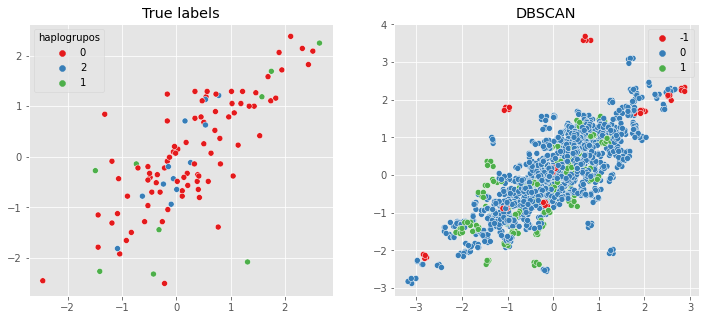

In [55]:
#x1_scaled medidas
dbscan = DBSCAN(eps=2, min_samples=minPts)
labels_db = dbscan.fit_predict(x1_scaled)

f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x1_scaled[:,0], y = x1_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x1_scaled[:,0], y = x1_scaled[:,1],hue=labels_db,ax=ax[1], palette="Set1")
ax[1].set_title('DBSCAN');


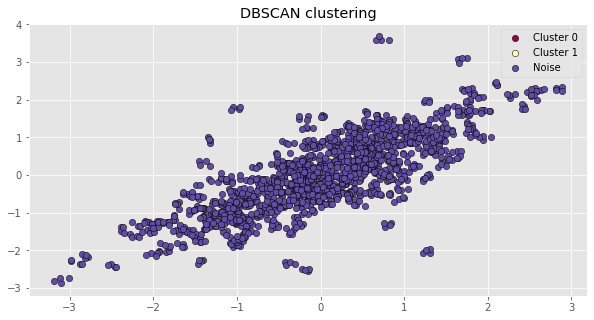

In [56]:
#x1_scaled medidas
# Implementación de DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(x1_scaled)
y_dbscan


labels = dbscan.labels_
unique_labels=set(labels);

fig, ax = plt.subplots(figsize=(10,5))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i,l in enumerate(unique_labels):
    if l ==-1:
        ax.scatter(x1_scaled[labels==l,0], x1_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Noise')
    else:
        ax.scatter(x1_scaled[labels==l,0], x1_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Cluster '+str(l))
    
ax.legend()
ax.set_title('DBSCAN clustering');
    

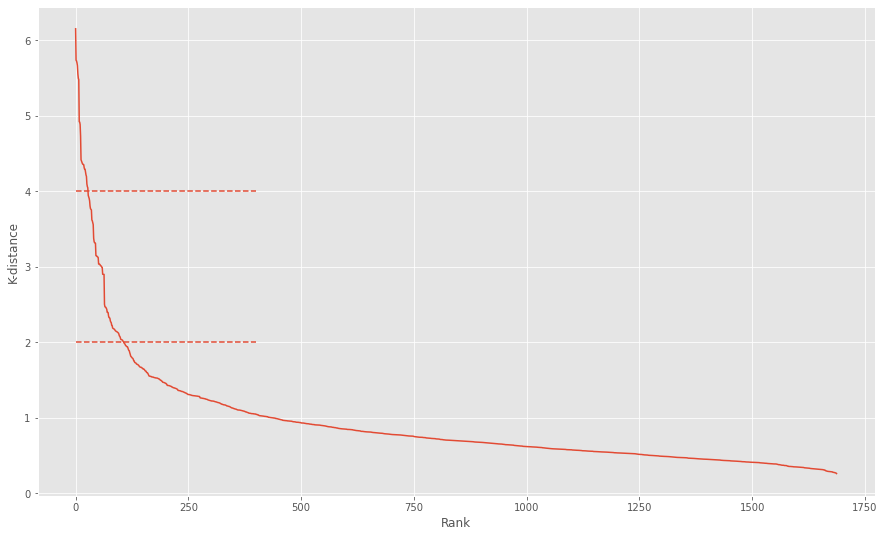

In [57]:
#x2_scaled powers
minPts=20;
k=minPts-1;

D=squareform(pdist(x2_scaled));

k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([2,4],0,400,linestyles='dashed');

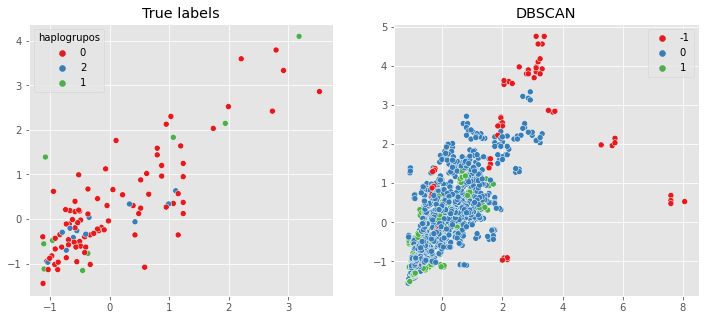

In [58]:
#x2_scaled powers
dbscan = DBSCAN(eps=2, min_samples=minPts)
labels_db = dbscan.fit_predict(x2_scaled)

f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x2_scaled[:,0], y = x2_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x2_scaled[:,0], y = x2_scaled[:,1],hue=labels_db,ax=ax[1], palette="Set1")
ax[1].set_title('DBSCAN');

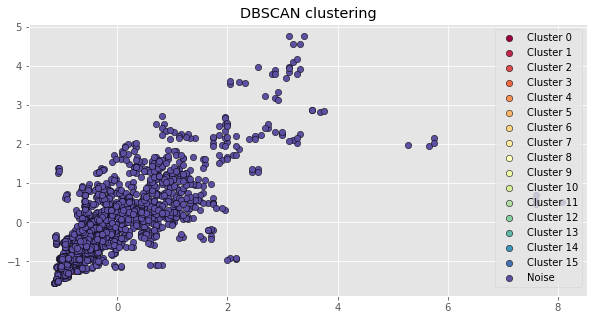

In [59]:
#x2_scaled medidas
# Implementación de DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(x2_scaled)
y_dbscan


labels = dbscan.labels_
unique_labels=set(labels);

fig, ax = plt.subplots(figsize=(10,5))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i,l in enumerate(unique_labels):
    if l ==-1:
        ax.scatter(x2_scaled[labels==l,0], x2_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Noise')
    else:
        ax.scatter(x2_scaled[labels==l,0], x2_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Cluster '+str(l))
    
ax.legend()
ax.set_title('DBSCAN clustering');

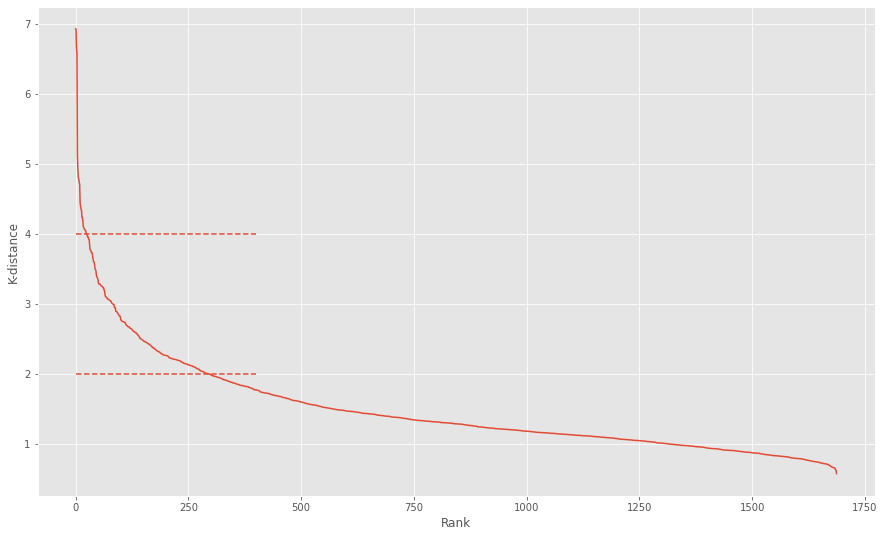

In [60]:
#x3_scaled ratios
minPts=20;
k=minPts-1;

D=squareform(pdist(x3_scaled));

k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([2,4],0,400,linestyles='dashed');

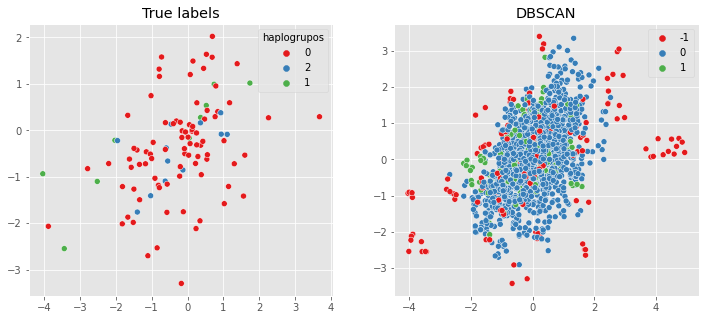

In [61]:
#x3_scaled ratios
dbscan = DBSCAN(eps=2, min_samples=minPts)
labels_db = dbscan.fit_predict(x3_scaled)

f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x3_scaled[:,0], y = x3_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x3_scaled[:,0], y = x3_scaled[:,1],hue=labels_db,ax=ax[1], palette="Set1")
ax[1].set_title('DBSCAN');

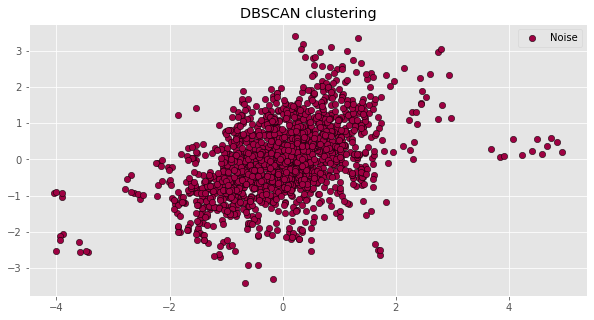

In [62]:
#x3_scaled ratios
# Implementación de DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(x3_scaled)
y_dbscan


labels = dbscan.labels_
unique_labels=set(labels);

fig, ax = plt.subplots(figsize=(10,5))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i,l in enumerate(unique_labels):
    if l ==-1:
        ax.scatter(x3_scaled[labels==l,0], x3_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Noise')
    else:
        ax.scatter(x3_scaled[labels==l,0], x3_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Cluster '+str(l))
    
ax.legend()
ax.set_title('DBSCAN clustering');

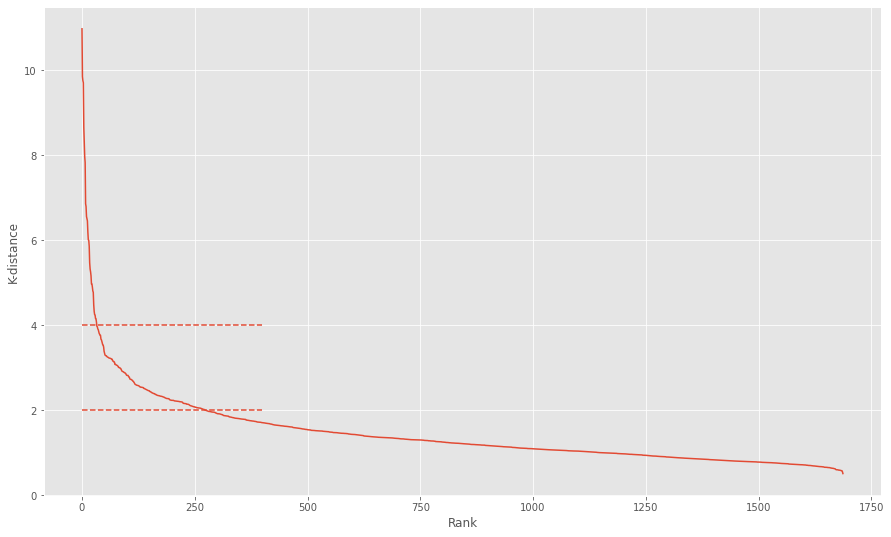

In [63]:
#x4_scaled power ratios
minPts=20;
k=minPts-1;

D=squareform(pdist(x4_scaled));

k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([2,4],0,400,linestyles='dashed');

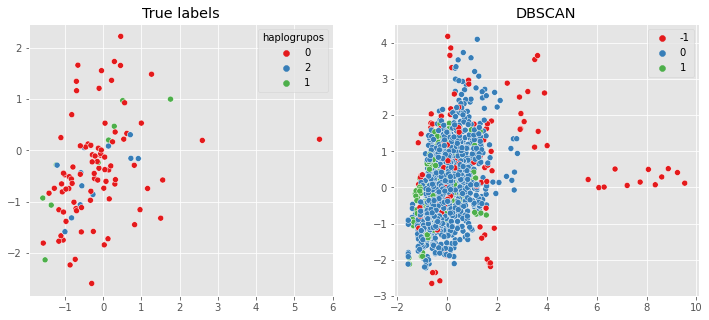

In [64]:
#x4_scaled power ratios
dbscan = DBSCAN(eps=2, min_samples=minPts)
labels_db = dbscan.fit_predict(x4_scaled)

f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x4_scaled[:,0], y = x4_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x4_scaled[:,0], y = x4_scaled[:,1],hue=labels_db,ax=ax[1], palette="Set1")
ax[1].set_title('DBSCAN');

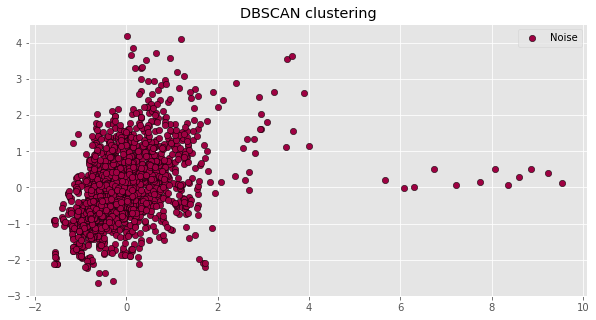

In [65]:
#x4_scaled powers ratios
# Implementación de DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(x4_scaled)
y_dbscan


labels = dbscan.labels_
unique_labels=set(labels);

fig, ax = plt.subplots(figsize=(10,5))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i,l in enumerate(unique_labels):
    if l ==-1:
        ax.scatter(x4_scaled[labels==l,0], x4_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Noise')
    else:
        ax.scatter(x4_scaled[labels==l,0], x4_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Cluster '+str(l))
    
ax.legend()
ax.set_title('DBSCAN clustering');

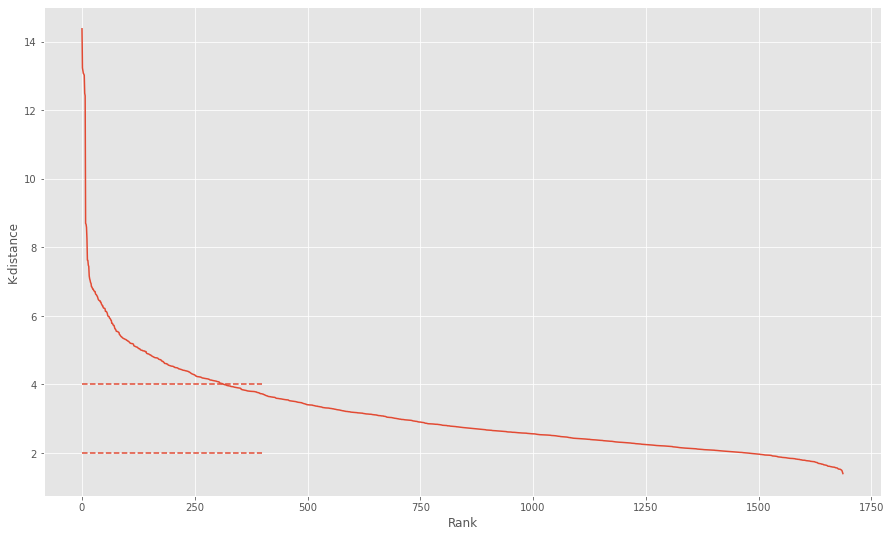

In [66]:
#x5_scaled todos
minPts=20;
k=minPts-1;

D=squareform(pdist(x5_scaled));

k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([2,4],0,400,linestyles='dashed');

<AxesSubplot:>

Text(0.5, 1.0, 'True labels')

<AxesSubplot:>

Text(0.5, 1.0, 'DBSCAN')

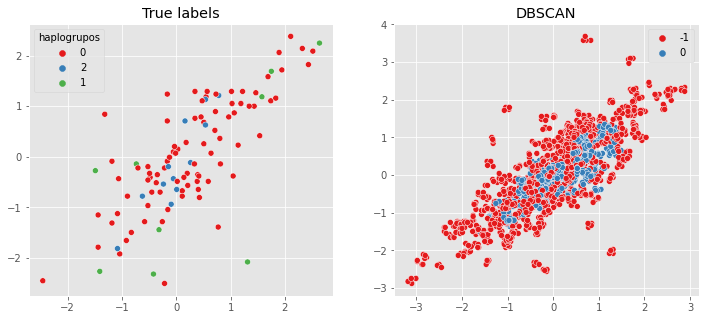

In [67]:
#x5_scaled todos
dbscan = DBSCAN(eps=2, min_samples=minPts)
labels_db = dbscan.fit_predict(x5_scaled)

f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x5_scaled[:,0], y = x5_scaled[:,1],hue=y_true,ax=ax[0], palette="Set1")
ax[0].set_title('True labels')
sns.scatterplot(x = x5_scaled[:,0], y = x5_scaled[:,1],hue=labels_db,ax=ax[1], palette="Set1")
ax[1].set_title('DBSCAN')

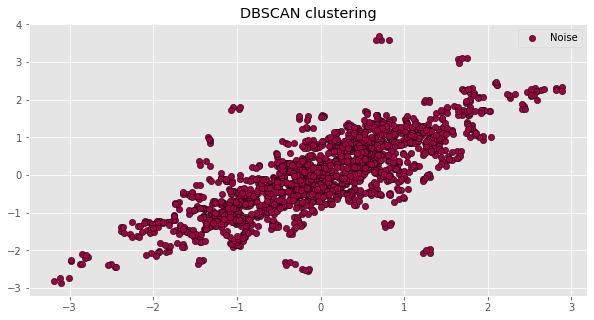

In [68]:
#x5_scaled todos
# Implementación de DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(x5_scaled)
y_dbscan


labels = dbscan.labels_
unique_labels=set(labels);

fig, ax = plt.subplots(figsize=(10,5))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i,l in enumerate(unique_labels):
    if l ==-1:
        ax.scatter(x5_scaled[labels==l,0], x5_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Noise')
    else:
        ax.scatter(x5_scaled[labels==l,0], x5_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Cluster '+str(l))
    
ax.legend()
ax.set_title('DBSCAN clustering');

# Modelos reducción dimensionalidad

## Prueba PCA

In [69]:
from sklearn.decomposition import PCA

In [70]:
df_x1 = pd.DataFrame(x1_scaled, index = x1.index, columns = x1.columns)
df_x2 = pd.DataFrame(x2_scaled, index = x2.index, columns = x2.columns)
df_x3 = pd.DataFrame(x3_scaled, index = x3.index, columns = x3.columns)
df_x4 = pd.DataFrame(x4_scaled, index = x4.index, columns = x4.columns)
df_x5 = pd.DataFrame(x5_scaled, index = x5.index, columns = x5.columns)

In [71]:
pca_1 = PCA().fit(df_x1)
pca_2 = PCA().fit(df_x2)
pca_3 = PCA().fit(df_x3)
pca_4 = PCA().fit(df_x4)
pca_5 = PCA().fit(df_x5)

### Pesos (loadings)

In [79]:
#x1 medidas
#Creamos un DataFrame con los loadings.
loadings_1 = pd.DataFrame(pca_1.components_.T, index=df_x1.columns, columns = ['PC' + str(x+1) for x in range(0, len(df_x1.columns))])
#loadings_1

In [80]:
#x2 powers
#Creamos un DataFrame con los loadings.
loadings_2 = pd.DataFrame(pca_2.components_.T, index=df_x2.columns, columns = ['PC' + str(x+1) for x in range(0, len(df_x2.columns))])
#loadings_2 

In [81]:
#x3 ratios
#Creamos un DataFrame con los loadings.
loadings_3 = pd.DataFrame(pca_3.components_.T, index=df_x3.columns, columns = ['PC' + str(x+1) for x in range(0, len(df_x3.columns))])
#loadings_3

In [82]:
#x4 powers_ratios
#Creamos un DataFrame con los loadings.
loadings_4 = pd.DataFrame(pca_4.components_.T, index=df_x4.columns, columns = ['PC' + str(x+1) for x in range(0, len(df_x4.columns))])
#loadings_4

In [84]:
#x5 todos
#Creamos un DataFrame con los loadings.
loadings_5 = pd.DataFrame(pca_5.components_.T, index=df_x5.columns, columns = ['PC' + str(x+1) for x in range(0, len(df_x5.columns))])
#loadings_5

In [93]:
df_pca_1 = pd.DataFrame(PCA().fit_transform(df_x1), columns = ['PC' + str(x+1) for x in range(0, len(df_x1.columns))], index = df_x1.index)
df_pca_2 = pd.DataFrame(PCA().fit_transform(df_x2), columns = ['PC' + str(x+1) for x in range(0, len(df_x2.columns))], index = df_x2.index)
df_pca_3 = pd.DataFrame(PCA().fit_transform(df_x3), columns = ['PC' + str(x+1) for x in range(0, len(df_x3.columns))], index = df_x3.index)
df_pca_4 = pd.DataFrame(PCA().fit_transform(df_x4), columns = ['PC' + str(x+1) for x in range(0, len(df_x4.columns))], index = df_x4.index)
df_pca_5 = pd.DataFrame(PCA().fit_transform(df_x5), columns = ['PC' + str(x+1) for x in range(0, len(df_x5.columns))], index = df_x5.index)

In [96]:
def plot_explained_variance(components_count, X):

    model_pca = PCA(components_count).fit(X)

    explained_variance = model_pca.explained_variance_ratio_

    print(explained_variance)

    cumulative_explained_variance = np.cumsum(explained_variance)

    #print(cumulative_explained_variance)

    plt.plot(cumulative_explained_variance)
    plt.xlabel('número de componentes')
    plt.ylabel('% de varianza explicada');

[0.63691166 0.22227471 0.07150333 0.02924664 0.01859941 0.01113719
 0.00416907 0.00318363 0.00297435]


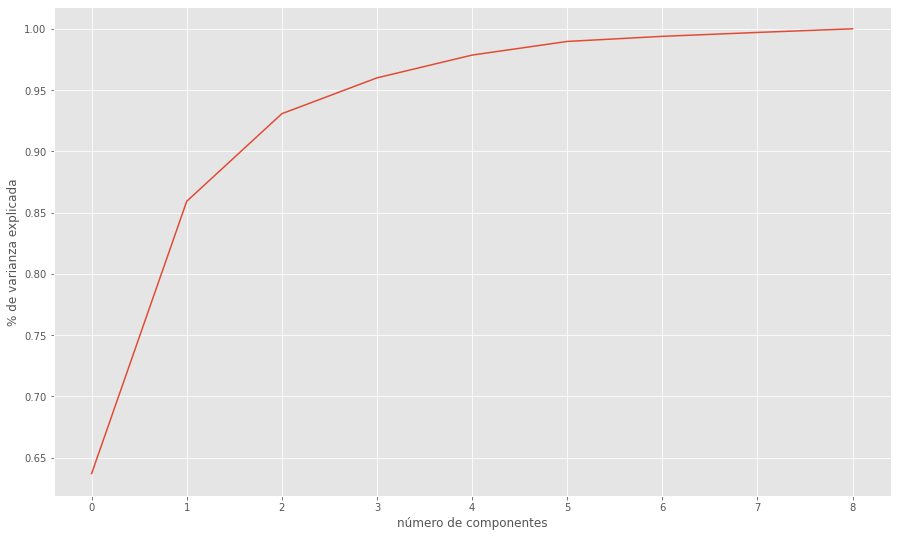

In [97]:
plot_explained_variance(components_count = len(df_x1.columns), X = df_x1)

[0.61229071 0.22291005 0.07729284 0.0394463  0.0234383  0.01292552
 0.00507918 0.00344407 0.00317303]


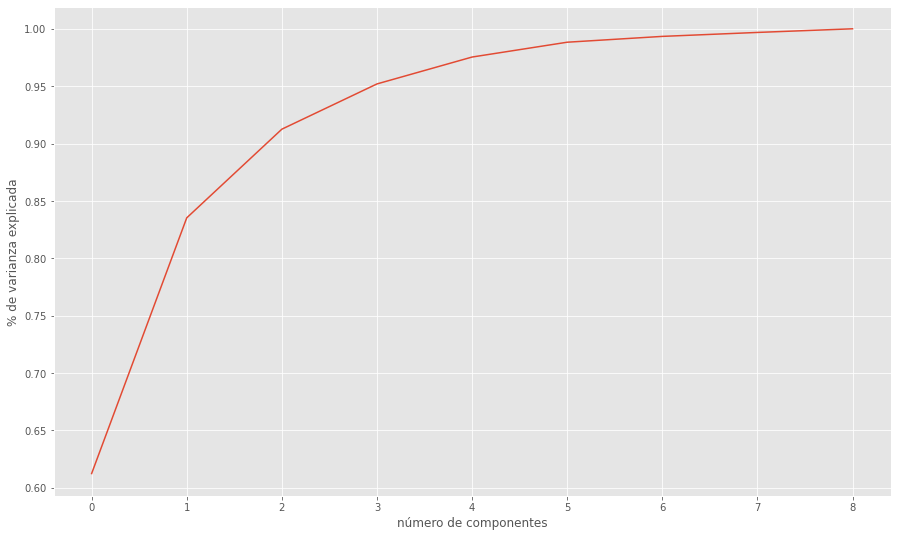

In [98]:
plot_explained_variance(components_count = len(df_x2.columns), X = df_x2)

[3.91625655e-01 2.17978526e-01 1.63000644e-01 9.89898637e-02
 9.01444436e-02 3.39964209e-02 2.69499496e-03 8.82840067e-04
 3.05715941e-04 2.70429976e-04 1.10466357e-04]


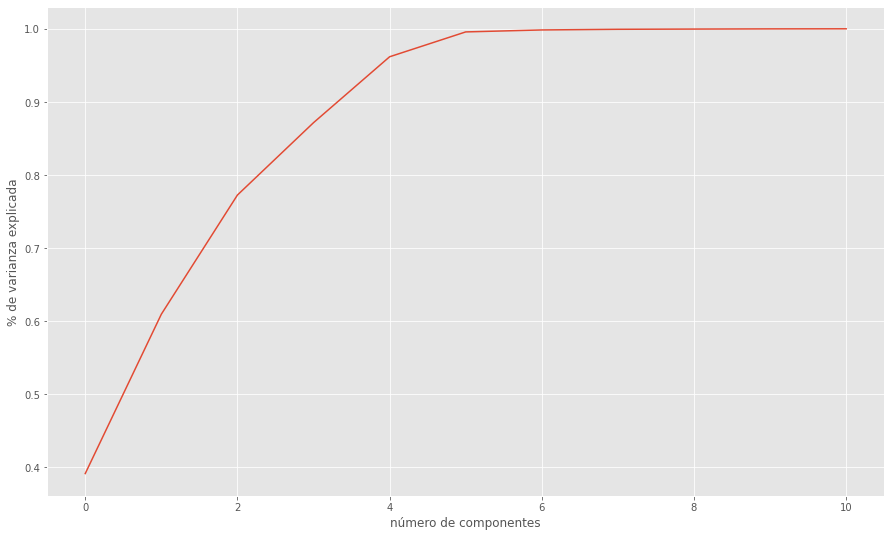

In [99]:
plot_explained_variance(components_count = len(df_x3.columns), X = df_x3)

[0.35067269 0.21746512 0.16128571 0.10788445 0.09816497 0.0393965
 0.01154897 0.00467711 0.00432097 0.00267022 0.00191328]


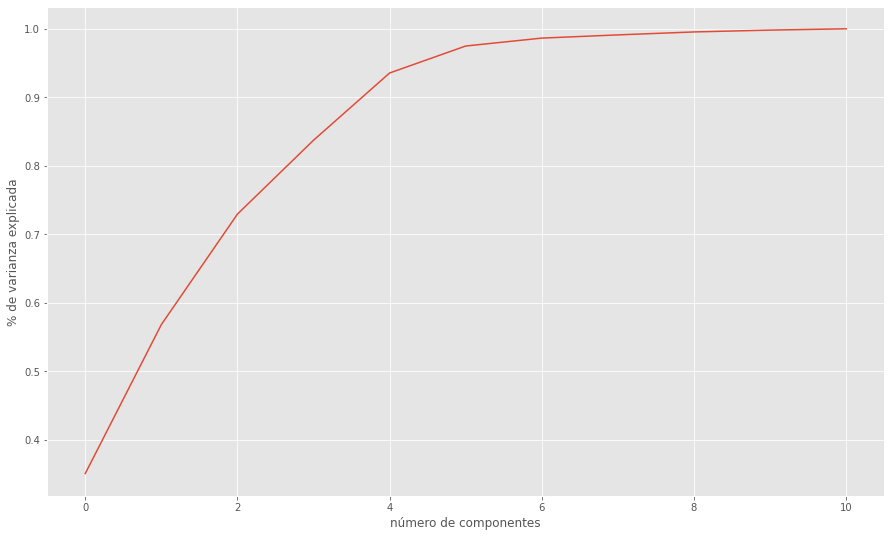

In [100]:
plot_explained_variance(components_count = len(df_x4.columns), X = df_x4)

[3.70213849e-01 2.32283588e-01 1.30964136e-01 7.38963378e-02
 6.61507528e-02 5.53478832e-02 2.44482716e-02 1.84468979e-02
 7.36983641e-03 5.04681899e-03 3.63046376e-03 3.42268560e-03
 2.08024091e-03 1.45949548e-03 1.29842474e-03 8.77983390e-04
 8.35753327e-04 7.05679134e-04 3.68430504e-04 2.86383605e-04
 2.29947693e-04 2.14834401e-04 1.63564729e-04 1.34301329e-04
 6.02276401e-05 2.91482480e-05 1.44292140e-05 6.30058106e-06
 5.29583036e-06 3.45797090e-06 1.60849340e-06 1.29052300e-06
 1.00719865e-06 6.73832881e-07]


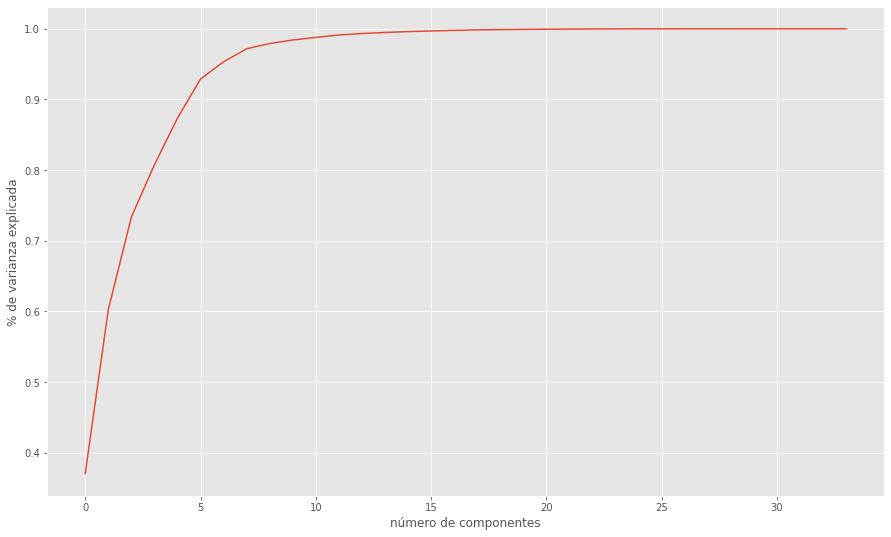

In [101]:
plot_explained_variance(components_count = len(df_x5.columns), X = df_x5)

### Proyección

In [102]:
#nuevo dataset con cada participación de feature
nuevo_data_pca = pd.DataFrame(pca_5.fit_transform(df_x5), index =df_x5.index,\
                              columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10','PC11','PC12','PC13',\
                                       'PC14','PC15','PC16','PC17','PC18','CP19','PC20', 'PC21', 'PC22', 'PC23','PC24', 'PC25', 'PC26', \
                                       'PC27','PC28', 'PC29','PC30','PC31','PC32','PC33','PC34'])

In [ ]:
data.reset_index()

,index,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,...,Power_NV,Power_Ratio_LE_AE,Power_Ratio_LT_AT,Power_Ratio_LA_AA,Power_Ratio_LE_LT,Power_Ratio_AE_AT,Power_Ratio_LA_LT,Power_Ratio_AA_AT,Power_Ratio_LE_LA,Power_Ratio_AE_AA
0,0,96,1,6.08,2.23,14.03,10.49,8.09,6.96,5.28,...,777.205187,0.018097,0.312515,0.547826,0.002042,0.035268,0.193792,0.110551,0.010539,0.319022
1,1,96,2,5.63,1.47,11.63,8.30,6.38,5.86,4.97,...,610.134461,0.004648,0.259414,0.711718,0.000984,0.054918,0.248472,0.090566,0.003960,0.606388
2,2,96,5,6.14,1.77,13.77,9.95,8.22,6.10,5.11,...,681.841766,0.006906,0.272619,0.303272,0.001001,0.039531,0.141263,0.126985,0.007089,0.311305
3,3,96,6,6.60,2.20,11.80,9.27,6.56,4.95,5.44,...,875.781161,0.012346,0.380882,0.324194,0.003172,0.097870,0.081302,0.095518,0.039018,1.024614
4,4,96,7,6.07,2.24,13.88,10.49,8.28,7.03,5.29,...,783.109853,0.018545,0.326245,0.519637,0.002079,0.036576,0.201706,0.126638,0.010308,0.288824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1683,554,25,6.12,1.96,12.97,9.71,7.76,5.23,5.25,...,759.691406,0.010520,0.314135,0.206329,0.001660,0.049573,0.084165,0.128141,0.019725,0.386864
1684,1684,554,26,6.29,1.93,12.96,9.76,7.58,5.23,5.26,...,765.496090,0.008864,0.321647,0.226637,0.001529,0.055486,0.082453,0.117019,0.018545,0.474161
1685,1685,554,27,5.59,1.47,13.51,9.58,8.04,6.33,5.34,...,813.139443,0.004782,0.252837,0.384229,0.000554,0.029311,0.190613,0.125430,0.002908,0.233681
1686,1686,554,28,5.61,1.50,13.52,9.68,8.18,6.33,5.32,...,801.025846,0.005111,0.262781,0.358593,0.000577,0.029645,0.182858,0.134001,0.003153,0.221227


In [ ]:
pca_haplo= pd.concat([nuevo_data_pca, data["haplogrupos"]], axis=1)

In [ ]:
pca_haplo.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,haplogrupos
0,1.879451,0.541499,0.878859,3.337913,2.732173,-1.032855,1.034464,-0.863420,-0.351436,0.295483,...,0.032261,-0.003682,0.007996,0.006841,-0.015930,-0.001498,0.003389,0.001582,-0.003083,0
1,-3.493884,0.805714,-2.407458,-0.720932,0.496158,-1.065208,-0.616935,0.026867,-0.282510,-0.168332,...,0.010050,-0.000050,0.004497,-0.014460,0.009974,0.002041,-0.005674,0.000582,0.001487,2
2,0.034532,-0.811380,2.485058,-0.511926,0.560611,0.151755,0.596080,-0.018333,-0.286113,0.178430,...,-0.011284,-0.010370,-0.002061,-0.004267,-0.009571,-0.001696,-0.003441,0.000896,0.001267,NaN
3,4.204249,9.330722,-1.549989,-1.604105,-0.456248,0.003587,-1.583203,0.277241,1.370611,0.773696,...,-0.039251,-0.031733,-0.004166,0.013771,-0.001898,-0.008870,0.009219,-0.005241,-0.010814,NaN
4,2.097490,0.387128,1.554832,3.798904,2.198114,-1.248394,0.530772,-0.835290,-0.407061,0.336501,...,0.037008,-0.004864,0.000882,0.006660,-0.013560,-0.002636,0.001509,-0.005865,-0.001996,NaN


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

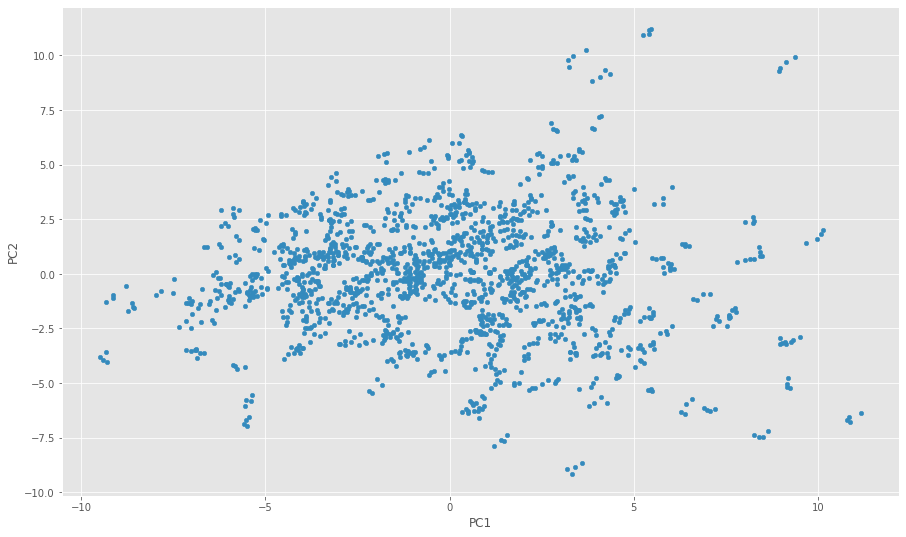

In [ ]:
pca_haplo.plot(x="PC1", y="PC2", kind ="scatter")

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

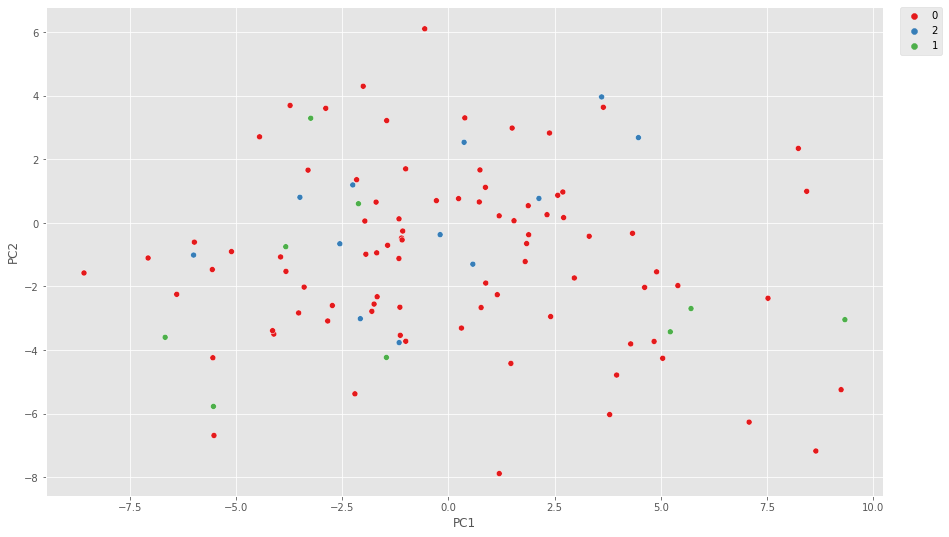

In [ ]:
sns.scatterplot(data=pca_haplo,x="PC1", y="PC2",hue="haplogrupos", palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

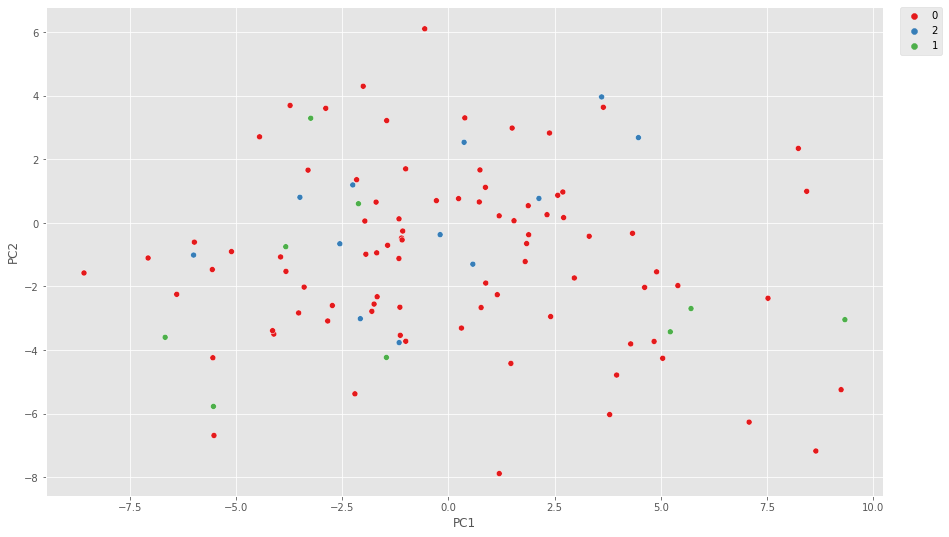

In [ ]:
sns.scatterplot(data=pca_haplo,x=pca_haplo.PC1, y=pca_haplo.PC2,hue="haplogrupos", palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
pca_5.explained_variance_ratio_

array([3.70213849e-01, 2.32283588e-01, 1.30964136e-01, 7.38963378e-02,
       6.61507528e-02, 5.53478832e-02, 2.44482716e-02, 1.84468979e-02,
       7.36983641e-03, 5.04681899e-03, 3.63046376e-03, 3.42268560e-03,
       2.08024091e-03, 1.45949548e-03, 1.29842474e-03, 8.77983390e-04,
       8.35753327e-04, 7.05679134e-04, 3.68430504e-04, 2.86383605e-04,
       2.29947693e-04, 2.14834401e-04, 1.63564729e-04, 1.34301329e-04,
       6.02276401e-05, 2.91482480e-05, 1.44292140e-05, 6.30058106e-06,
       5.29583036e-06, 3.45797090e-06, 1.60849340e-06, 1.29052300e-06,
       1.00719865e-06, 6.73832881e-07])

### Bastón quebrado

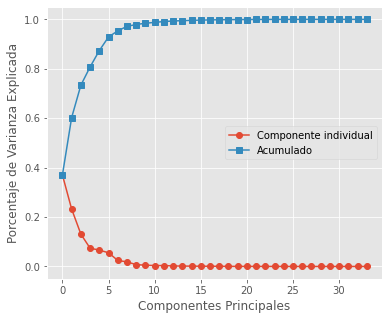

In [ ]:
plt.figure(figsize=(6,5))

plt.plot(pca_5.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot(np.cumsum(pca_5.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada'); plt.xlabel('Componentes Principales')
plt.ylim(-0.05,1.05); plt.xticks()
plt.legend(loc=0);

## Prueba TSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(random_state=42)

proj_tsne = tsne.fit_transform(df_x5)

In [ ]:
df_x5.head()

,AE,LE,AT,LT,AA,LA,NV,Morfotipo_LB,Morfotipo_LU,Ratio_LE_AE,...,Power_NV,Power_Ratio_LE_AE,Power_Ratio_LT_AT,Power_Ratio_LA_AA,Power_Ratio_LE_LT,Power_Ratio_AE_AT,Power_Ratio_LA_LT,Power_Ratio_AA_AT,Power_Ratio_LE_LA,Power_Ratio_AE_AA
0,-0.165818,1.238365,0.391905,0.495167,0.321955,0.760541,0.454609,-0.391159,0.403156,2.256107,...,0.393611,2.593865,0.196046,0.366347,1.287535,-1.227032,0.244204,-0.163913,0.386974,-0.891833
1,-0.624470,-0.779665,-0.843994,-1.029964,-1.064153,-0.442926,-0.584837,-0.391159,0.403156,-0.554716,...,-0.652027,-0.555070,-0.687849,1.222511,-0.266685,0.404190,1.114621,-1.023355,-0.599501,0.942224
2,-0.104664,0.016926,0.258016,0.119107,0.427331,-0.180352,-0.115410,-0.391159,0.403156,0.168034,...,-0.203236,-0.026344,-0.468042,-0.911200,-0.241029,-0.873159,-0.591961,0.542784,-0.130316,-0.941083
3,0.364181,1.158706,-0.756451,-0.354450,-0.918247,-1.438522,0.991097,-0.391159,0.403156,1.366566,...,1.010564,1.247298,1.334049,-0.801902,2.946920,3.969806,-1.546420,-0.810370,4.657496,3.611463
4,-0.176010,1.264918,0.314661,0.495167,0.475967,0.837125,0.488139,-0.391159,0.403156,2.315999,...,0.430566,2.698876,0.424586,0.219086,1.341693,-1.118462,0.370191,0.527867,0.352384,-1.084563


In [ ]:
df_tsne= pd.DataFrame(proj_tsne)

In [ ]:
df_tsne.head()

,0,1
0,-24.221655,-1.935863
1,28.720104,-0.214968
2,-2.075243,-3.181887
3,-21.076075,-47.128918
4,-24.294117,-2.193568


In [ ]:
tsne_haplo= pd.concat([df_tsne, data["haplogrupos"]], axis=1)

In [ ]:
tsne_haplo.columns = ["X","Y","haplogrupos"]

In [ ]:
tsne_haplo.head()

,X,Y,haplogrupos
0,-24.221655,-1.935863,0
1,28.720104,-0.214968,2
2,-2.075243,-3.181887,NaN
3,-21.076075,-47.128918,NaN
4,-24.294117,-2.193568,NaN


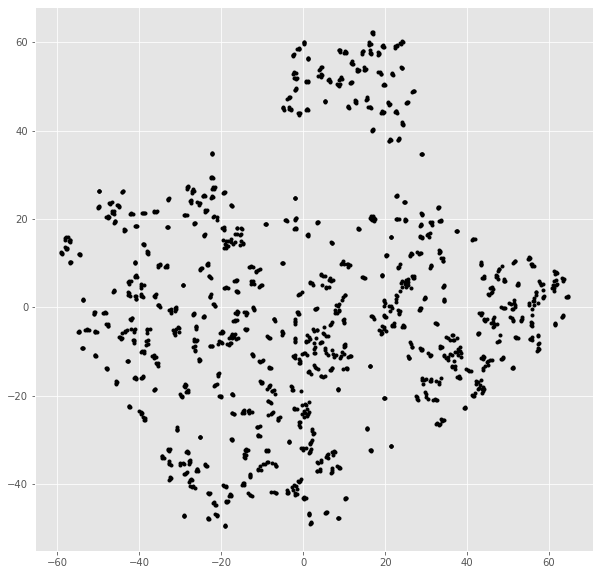

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# get axis from plot -  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gca.html
ax = ax or plt.gca()
    
coord_x = proj_tsne[:, 0]
coord_y = proj_tsne[:, 1]
ax.plot(coord_x, coord_y, '.k')    

<AxesSubplot:xlabel='X', ylabel='Y'>

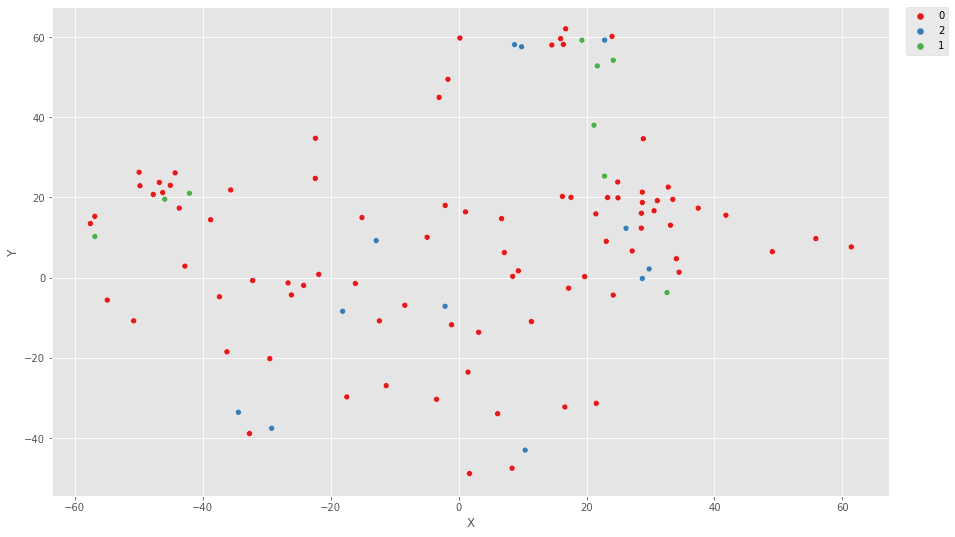

In [ ]:
sns.scatterplot(data=tsne_haplo,x="X", y="Y",hue="haplogrupos",palette="Set1" )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Modelos clasificación

In [ ]:
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
from sklearn.metrics import accuracy_score

## CART

### CART con variables de PCA target HAPLOGRUPOS

In [ ]:
pca_haplo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC1          1688 non-null   float64
 1   PC2          1688 non-null   float64
 2   PC3          1688 non-null   float64
 3   PC4          1688 non-null   float64
 4   PC5          1688 non-null   float64
 5   PC6          1688 non-null   float64
 6   PC7          1688 non-null   float64
 7   PC8          1688 non-null   float64
 8   PC9          1688 non-null   float64
 9   PC10         1688 non-null   float64
 10  PC11         1688 non-null   float64
 11  PC12         1688 non-null   float64
 12  PC13         1688 non-null   float64
 13  PC14         1688 non-null   float64
 14  PC15         1688 non-null   float64
 15  PC16         1688 non-null   float64
 16  PC17         1688 non-null   float64
 17  PC18         1688 non-null   float64
 18  CP19         1688 non-null   float64
 19  PC20  

In [ ]:
nuevo_pca_haplo = pca_haplo.dropna()

In [ ]:
nuevo_pca_haplo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 1664
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC1          106 non-null    float64
 1   PC2          106 non-null    float64
 2   PC3          106 non-null    float64
 3   PC4          106 non-null    float64
 4   PC5          106 non-null    float64
 5   PC6          106 non-null    float64
 6   PC7          106 non-null    float64
 7   PC8          106 non-null    float64
 8   PC9          106 non-null    float64
 9   PC10         106 non-null    float64
 10  PC11         106 non-null    float64
 11  PC12         106 non-null    float64
 12  PC13         106 non-null    float64
 13  PC14         106 non-null    float64
 14  PC15         106 non-null    float64
 15  PC16         106 non-null    float64
 16  PC17         106 non-null    float64
 17  PC18         106 non-null    float64
 18  CP19         106 non-null    float64
 19  PC20   

In [ ]:
X_PCA = nuevo_pca_haplo[['PC1', 'PC2', 'PC3', 'PC4','PC5']]
y_PCA = nuevo_pca_haplo['haplogrupos']

In [ ]:
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA,y_PCA,stratify = nuevo_pca_haplo['haplogrupos'],random_state=0)

In [ ]:
clf_dt = DecisionTreeClassifier(max_depth = 10, random_state=42)
clf_dt = clf_dt.fit(X_train_PCA,y_train_PCA)

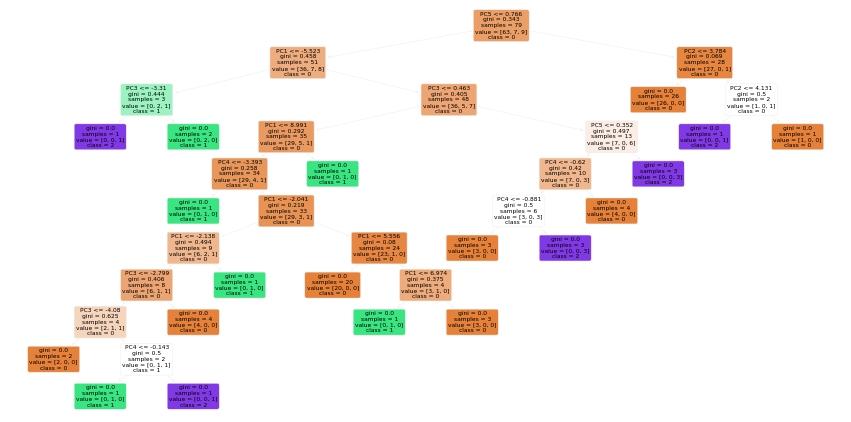

In [ ]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["0","1", "2"], 
          feature_names=X_train_PCA.columns); 

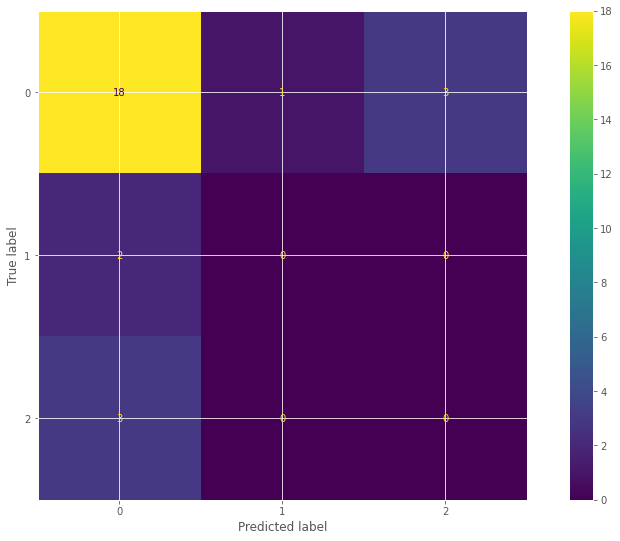

In [ ]:
plot_confusion_matrix(clf_dt, X_test_PCA, y_test_PCA, display_labels=["0","1","2"])

In [ ]:
accuracy_score(y_test_PCA, clf_dt.predict(X_test_PCA))

0.6666666666666666

## CART con oversampling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dataNa = data.dropna()

In [ ]:
dataNa.shape

(106, 39)

In [ ]:
newX = dataNa[Todo]
newy = dataNa['haplogrupos']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(newX, newy, stratify = dataNa['haplogrupos'], random_state=0)

In [ ]:
# chequeamos la presencia relativa de cada clase y el tamaño de los datasets
print('Entrenamiento:',X_train.shape)
print('Testeo:',X_test.shape)
print('\nClases train:')
print(y_train.value_counts(normalize=True))
print('\nClases test:')
print(y_test.value_counts(normalize=True))

Entrenamiento: (79, 34)
Testeo: (27, 34)

Clases train:
0    0.797468
2    0.113924
1    0.088608
Name: haplogrupos, dtype: float64

Clases test:
0    0.814815
2    0.111111
1    0.074074
Name: haplogrupos, dtype: float64


### OverSampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler=RandomOverSampler(sampling_strategy='minority');

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_os.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
1    63
0    63
2     9
Name: haplogrupos, dtype: int64

Composición del test set:
0    22
2     3
1     2
Name: haplogrupos, dtype: int64


In [ ]:
X_train_os2,y_train_os2=oversampler.fit_resample(X_train_os,y_train_os);

print('Composición del training set:')
print(y_train_os2.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
0    63
1    63
2    63
Name: haplogrupos, dtype: int64

Composición del test set:
0    22
2     3
1     2
Name: haplogrupos, dtype: int64


### CART con variables originales oversampleadas

In [ ]:
clf_dt = DecisionTreeClassifier(max_depth = 7, random_state=42)
clf_dt = clf_dt.fit(X_train_os2,y_train_os2)

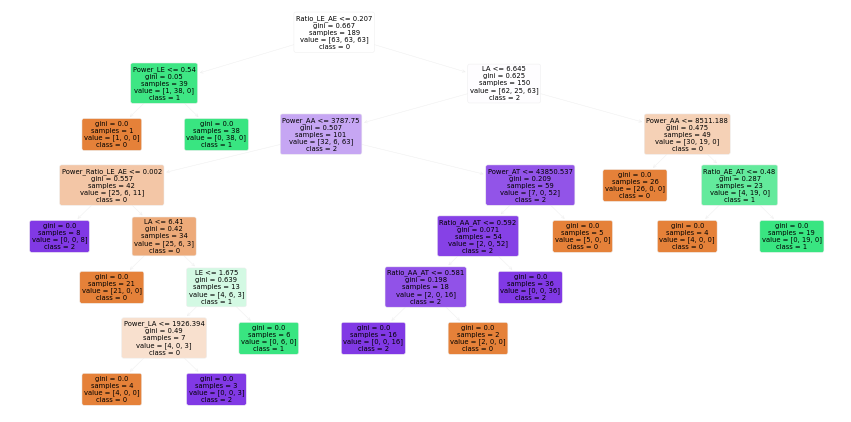

In [ ]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["0", "1", "2"], 
          feature_names=X_train_os2.columns); 

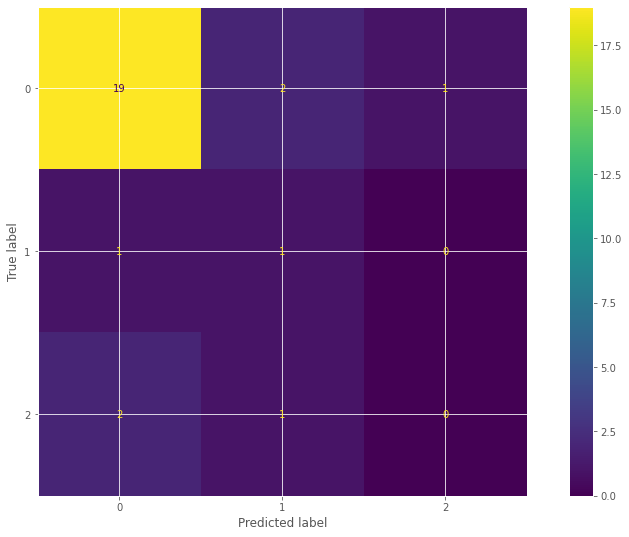

In [ ]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["0", "1", "2"])

In [ ]:
accuracy_score(y_test, clf_dt.predict(X_test))

0.7407407407407407

## XGBoost

In [ ]:
from xgboost import XGBClassifier


In [ ]:
y_train_PCA = y_train_PCA.astype("int")

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train_PCA)
y_train_PCA = le.transform(y_train_PCA)

LabelEncoder()

In [ ]:
xgboost = XGBClassifier()

In [ ]:
clf_XGB = xgboost.fit(X_train_PCA,y_train_PCA)

/mnt/Data/ProgramFiles/anaconda3/envs/dhds22/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:54:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
accuracy_score(le.transform(y_test_PCA), xgboost.predict(X_test_PCA))

ValueError: y contains previously unseen labels: '2'